## Conexão ao Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Automatização da Análise Exploratória

In [2]:
# Importação de bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

#### Parte 1: Análise das estatísticas descritivas

In [57]:
idxs = [1, 17, 46, 75, 88, 115, 153, 236, 301]
def estatistica_descritiva(idxs, variable):
  '''
  entrada :
    - list : índices dos cortes escolhidos
    - str : variável a ser avaliada dentre ['force_x', 'force_y', 'force_z', 'acc_x', 'acc_y', 'acc_z', 'ae']
  saída :
    - 1 gráfico comparando as medidas estatísticas descritivas da variável escolhida para cada um dos cortes
  '''

  standard_path = '/content/drive/My Drive/TCC - Desenvolvimento/c1/'
  base = pd.DataFrame()

  # percorrer os cortes selecionados na lista de índices
  for i in idxs:

    # definir filepath
    filepath = standard_path + f'c_1_{i:03d}.csv'

    # renomear as colunas identificando os cortes
    cols = (
    [f'force_x_{i:03d}'] +
    [f'force_y_{i:03d}'] +
    [f'force_z_{i:03d}'] +
    [f'acc_x_{i:03d}'] +
    [f'acc_y_{i:03d}'] +
    [f'acc_z_{i:03d}'] +
    [f'ae_{i:03d}'])
    df = pd.read_csv(filepath, header=None, names=cols)

    # renomear a variável segundo os cortes selecionados
    variable_id = variable + f'_{i:03d}'

    # armazenar a série correspondente em uma base
    base = pd.concat([base, pd.DataFrame(df[variable_id].describe())], axis=1)

  base.drop(['count'], inplace=True)
  base_transposed = base.T

  # Definindo o estilo do Seaborn
  sns.set(style='whitegrid')

  # Transformar o DataFrame para o formato longo
  df_melted = base_transposed.reset_index().melt(id_vars='index', var_name='Estatística', value_name='Valores')

  # Renomear a coluna 'index' para algo mais significativo
  df_melted.rename(columns={'index': 'Força'}, inplace=True)

  # Criando o gráfico
  plt.figure(figsize=(9, 6))
  line_plot = sns.lineplot(data=df_melted, x='Força', y='Valores', hue='Estatística', marker='o')

  # Melhorar a estética do gráfico
  line_plot.set_title(f'Estatísticas descritivas da evolução da Emissão Acústica para diferentes cortes', fontsize=12)
  line_plot.set_xlabel('', fontsize=12)
  line_plot.set_ylabel('Valores', fontsize=12)
  line_plot.set_xticklabels(labels = base_transposed.index.values, rotation=45, fontsize=10)

  # Ajustando a legenda
  plt.legend(title='Medidas Estatísticas', bbox_to_anchor=(1.05, 1), loc='upper left')

  # Ajustando o layout para evitar sobreposição
  plt.tight_layout()

  # Exibir o gráfico
  plt.show()

  return None

<ipython-input-44-e7c8982d59a6>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_plot.set_xticklabels(labels = base_transposed.index.values, rotation=45, fontsize=10)


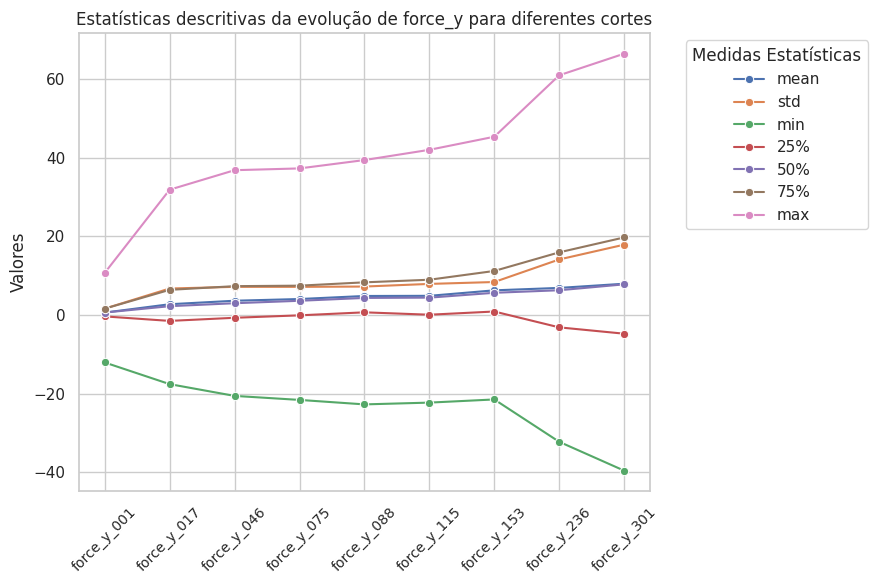

In [46]:
estatistica_descritiva(idxs, 'force_y')

<ipython-input-47-c83e3604e619>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_plot.set_xticklabels(labels = base_transposed.index.values, rotation=45, fontsize=10)


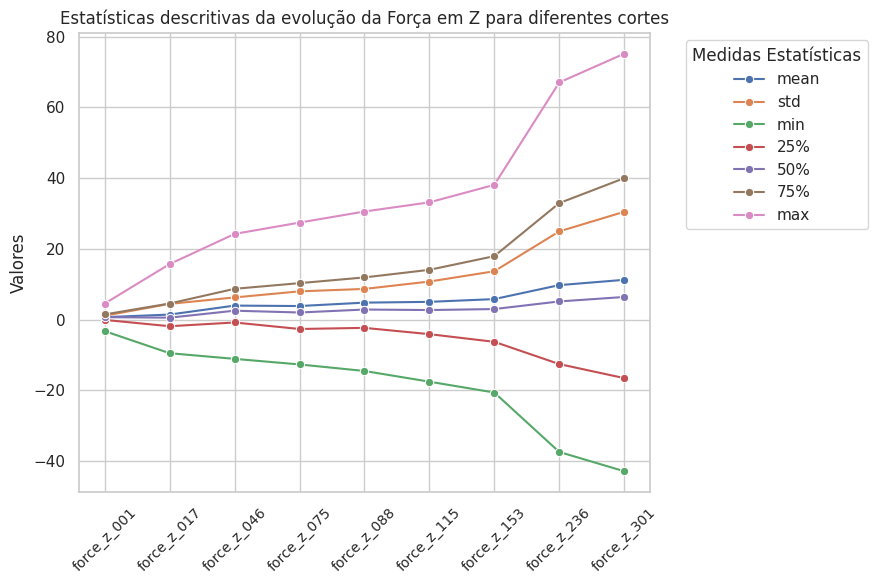

In [48]:
estatistica_descritiva(idxs, 'force_z')

<ipython-input-49-a7bea13e5b8b>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_plot.set_xticklabels(labels = base_transposed.index.values, rotation=45, fontsize=10)


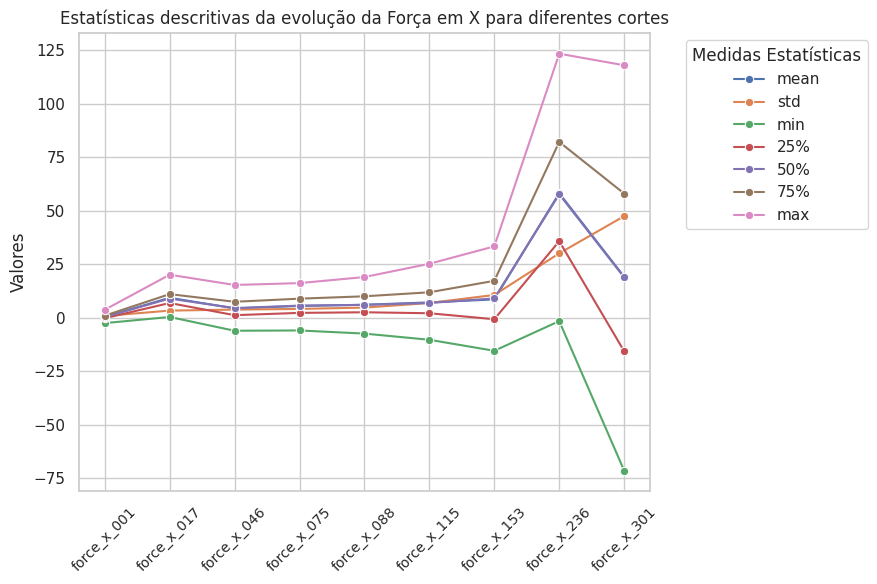

In [50]:
estatistica_descritiva(idxs, 'force_x')

<ipython-input-51-114da37bc594>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_plot.set_xticklabels(labels = base_transposed.index.values, rotation=45, fontsize=10)


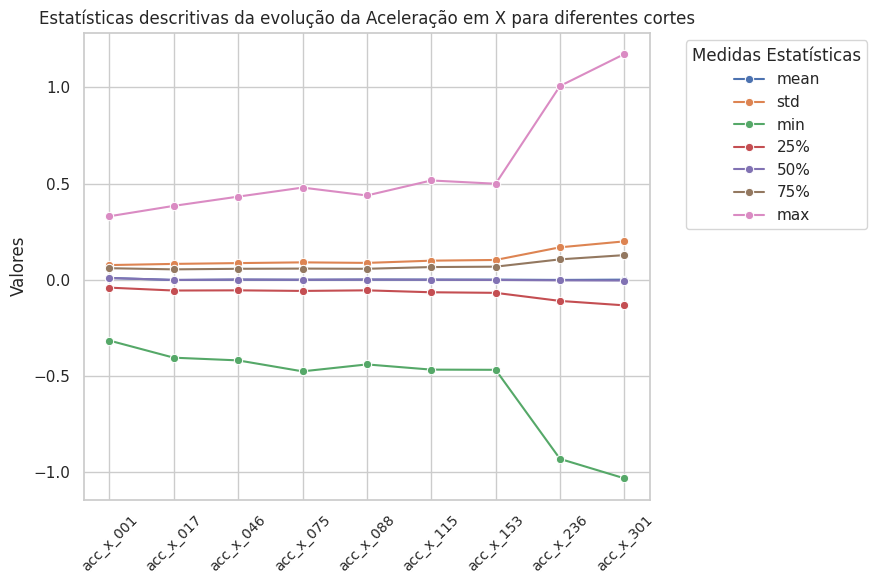

In [52]:
estatistica_descritiva(idxs, 'acc_x')

<ipython-input-53-cbc0a67d3ffb>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_plot.set_xticklabels(labels = base_transposed.index.values, rotation=45, fontsize=10)


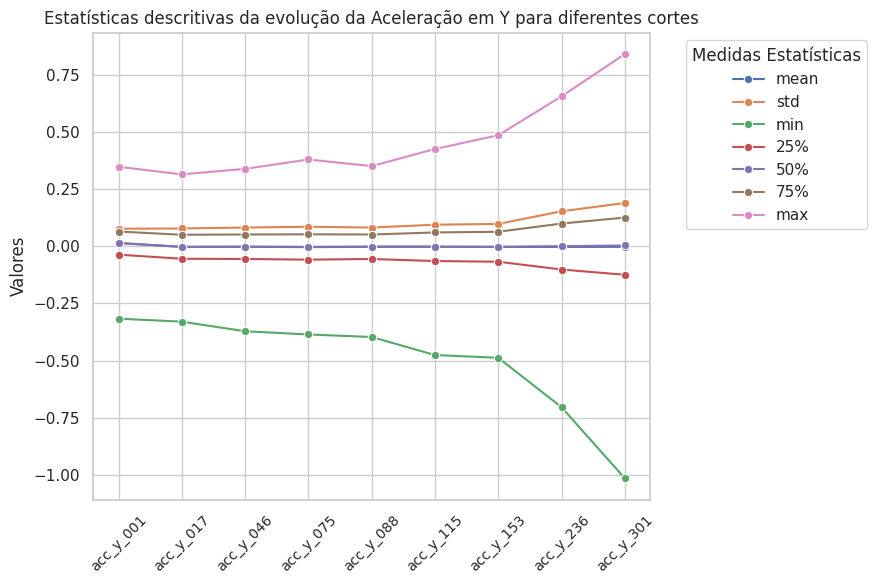

In [54]:
estatistica_descritiva(idxs, 'acc_y')

<ipython-input-55-cc432dce01f8>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_plot.set_xticklabels(labels = base_transposed.index.values, rotation=45, fontsize=10)


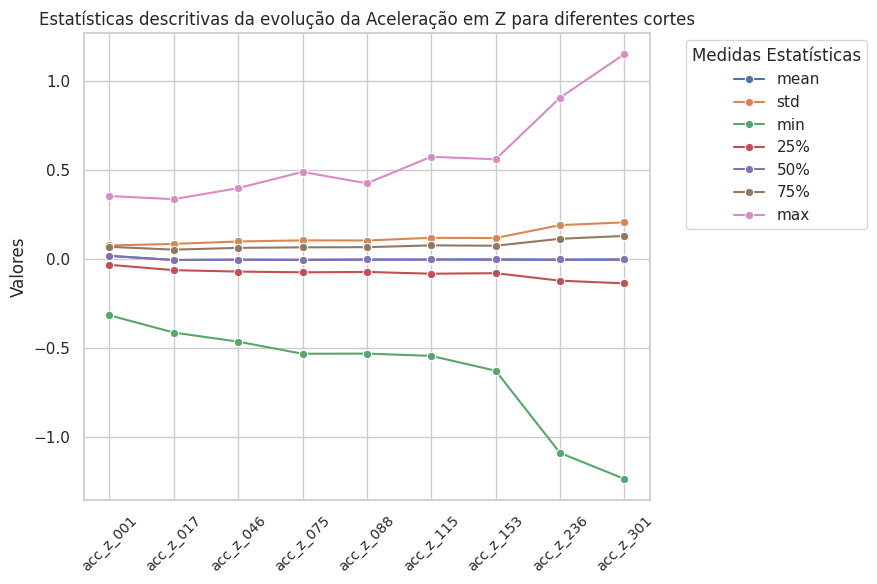

In [56]:
estatistica_descritiva(idxs, 'acc_z')

<ipython-input-57-95a3e63e8569>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_plot.set_xticklabels(labels = base_transposed.index.values, rotation=45, fontsize=10)


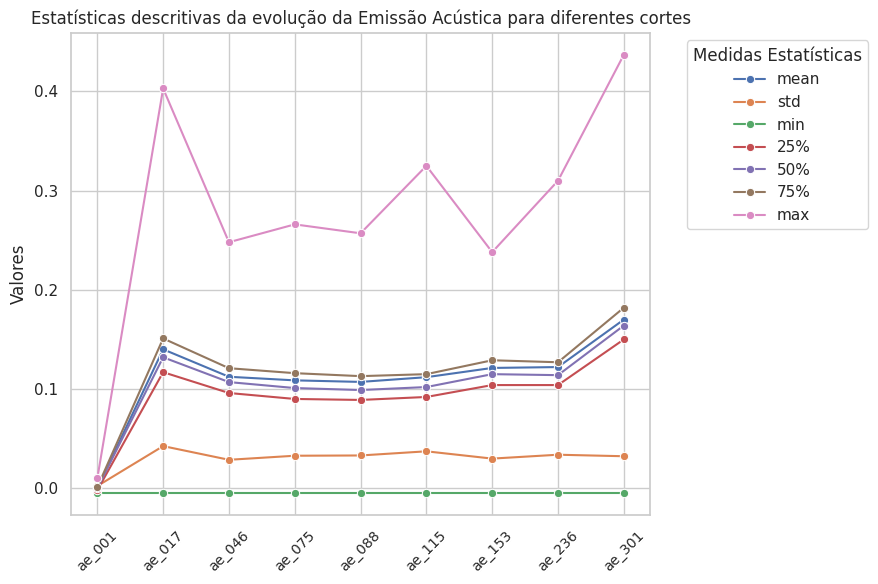

In [58]:
estatistica_descritiva(idxs, 'ae')

#### Parte 2: Evolução de cada série por fase

- Fase 1: Cortes (0, 75)
- Fase 2: Cortes (75, 225)
- Fase 3: Cortes (225, 315)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def evolucao_por_fase(idxs, variable):
    # Usar o estilo do seaborn
    sns.set(style="whitegrid")

    standard_path = '/content/drive/My Drive/TCC - Desenvolvimento/c1/'

    # Definir a organização dos subplots (3x3) com um tamanho adequado
    fig, axs = plt.subplots(3, 3, figsize=(24, 16))

    # Definir uma paleta de cores para as colunas dos gráficos
    colors = sns.color_palette("Set1", n_colors=3)  # Paleta com 3 cores distintas

    # Iterar sobre os índices e eixos dos subplots
    for idx, i in enumerate(idxs):
        # Definir filepath
        filepath = standard_path + f'c_1_{i:03d}.csv'

        # Verificar se o arquivo existe
        try:
            df = pd.read_csv(filepath, header=None)
        except FileNotFoundError:
            print(f"Arquivo não encontrado: {filepath}")
            continue  # Pula para o próximo índice se o arquivo não existir

        # Renomear as colunas
        cols = (
            [f'force_x_{i:03d}'] +
            [f'force_y_{i:03d}'] +
            [f'force_z_{i:03d}'] +
            [f'acc_x_{i:03d}'] +
            [f'acc_y_{i:03d}'] +
            [f'acc_z_{i:03d}'] +
            [f'ae_{i:03d}'])
        df.columns = cols  # Aplicar os nomes de colunas ao DataFrame

        # Renomear a variável segundo os cortes selecionados
        variable_id = variable + f'_{i:03d}'

        # Definir a posição do subplot (linha, coluna) na matriz 3x3
        col = idx // 3
        row = idx % 3

        colors = sns.color_palette("Set1", n_colors=3)  # Paleta com 3 cores distintas

        # Criar handles para a legenda das fases (vermelho = fase 1, azul = fase 2, verde = fase 3)
        handles = [plt.Line2D([0], [0], color=colors[0], lw=2, label='Fase Inicial'),
                  plt.Line2D([0], [0], color=colors[1], lw=2, label='Fase Intermediária'),
                  plt.Line2D([0], [0], color=colors[2], lw=2, label='Fase Final')]

        # Plotar a evolução da variável no subplot correspondente, com uma cor diferente para cada coluna
        if variable_id in df.columns:
            sns.lineplot(
                data=df[variable_id].rolling(1200).median(),
                ax=axs[row, col],
                color=colors[col],  # Aplicar cor diferente para cada coluna
                markers=True  # Marcadores em cada ponto
            )
            axs[row, col].set_title(f'Mediana Móvel da Evolução de {variable_id}', fontsize=16)
        else:
            print(f"Variável {variable_id} não encontrada no arquivo {filepath}")

        # Configurar legendas e rótulos dos eixos
        axs[row, col].set_ylabel("Valores", fontsize=12)
        axs[row, col].set_xlabel("Índice do dado aquisitado", fontsize=12)

    # Adicionar legenda personalizada ao gráfico (fora do grid)
    fig.legend(handles=handles, loc='lower right', fontsize=12, title='Fases de Desgaste')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

    return None

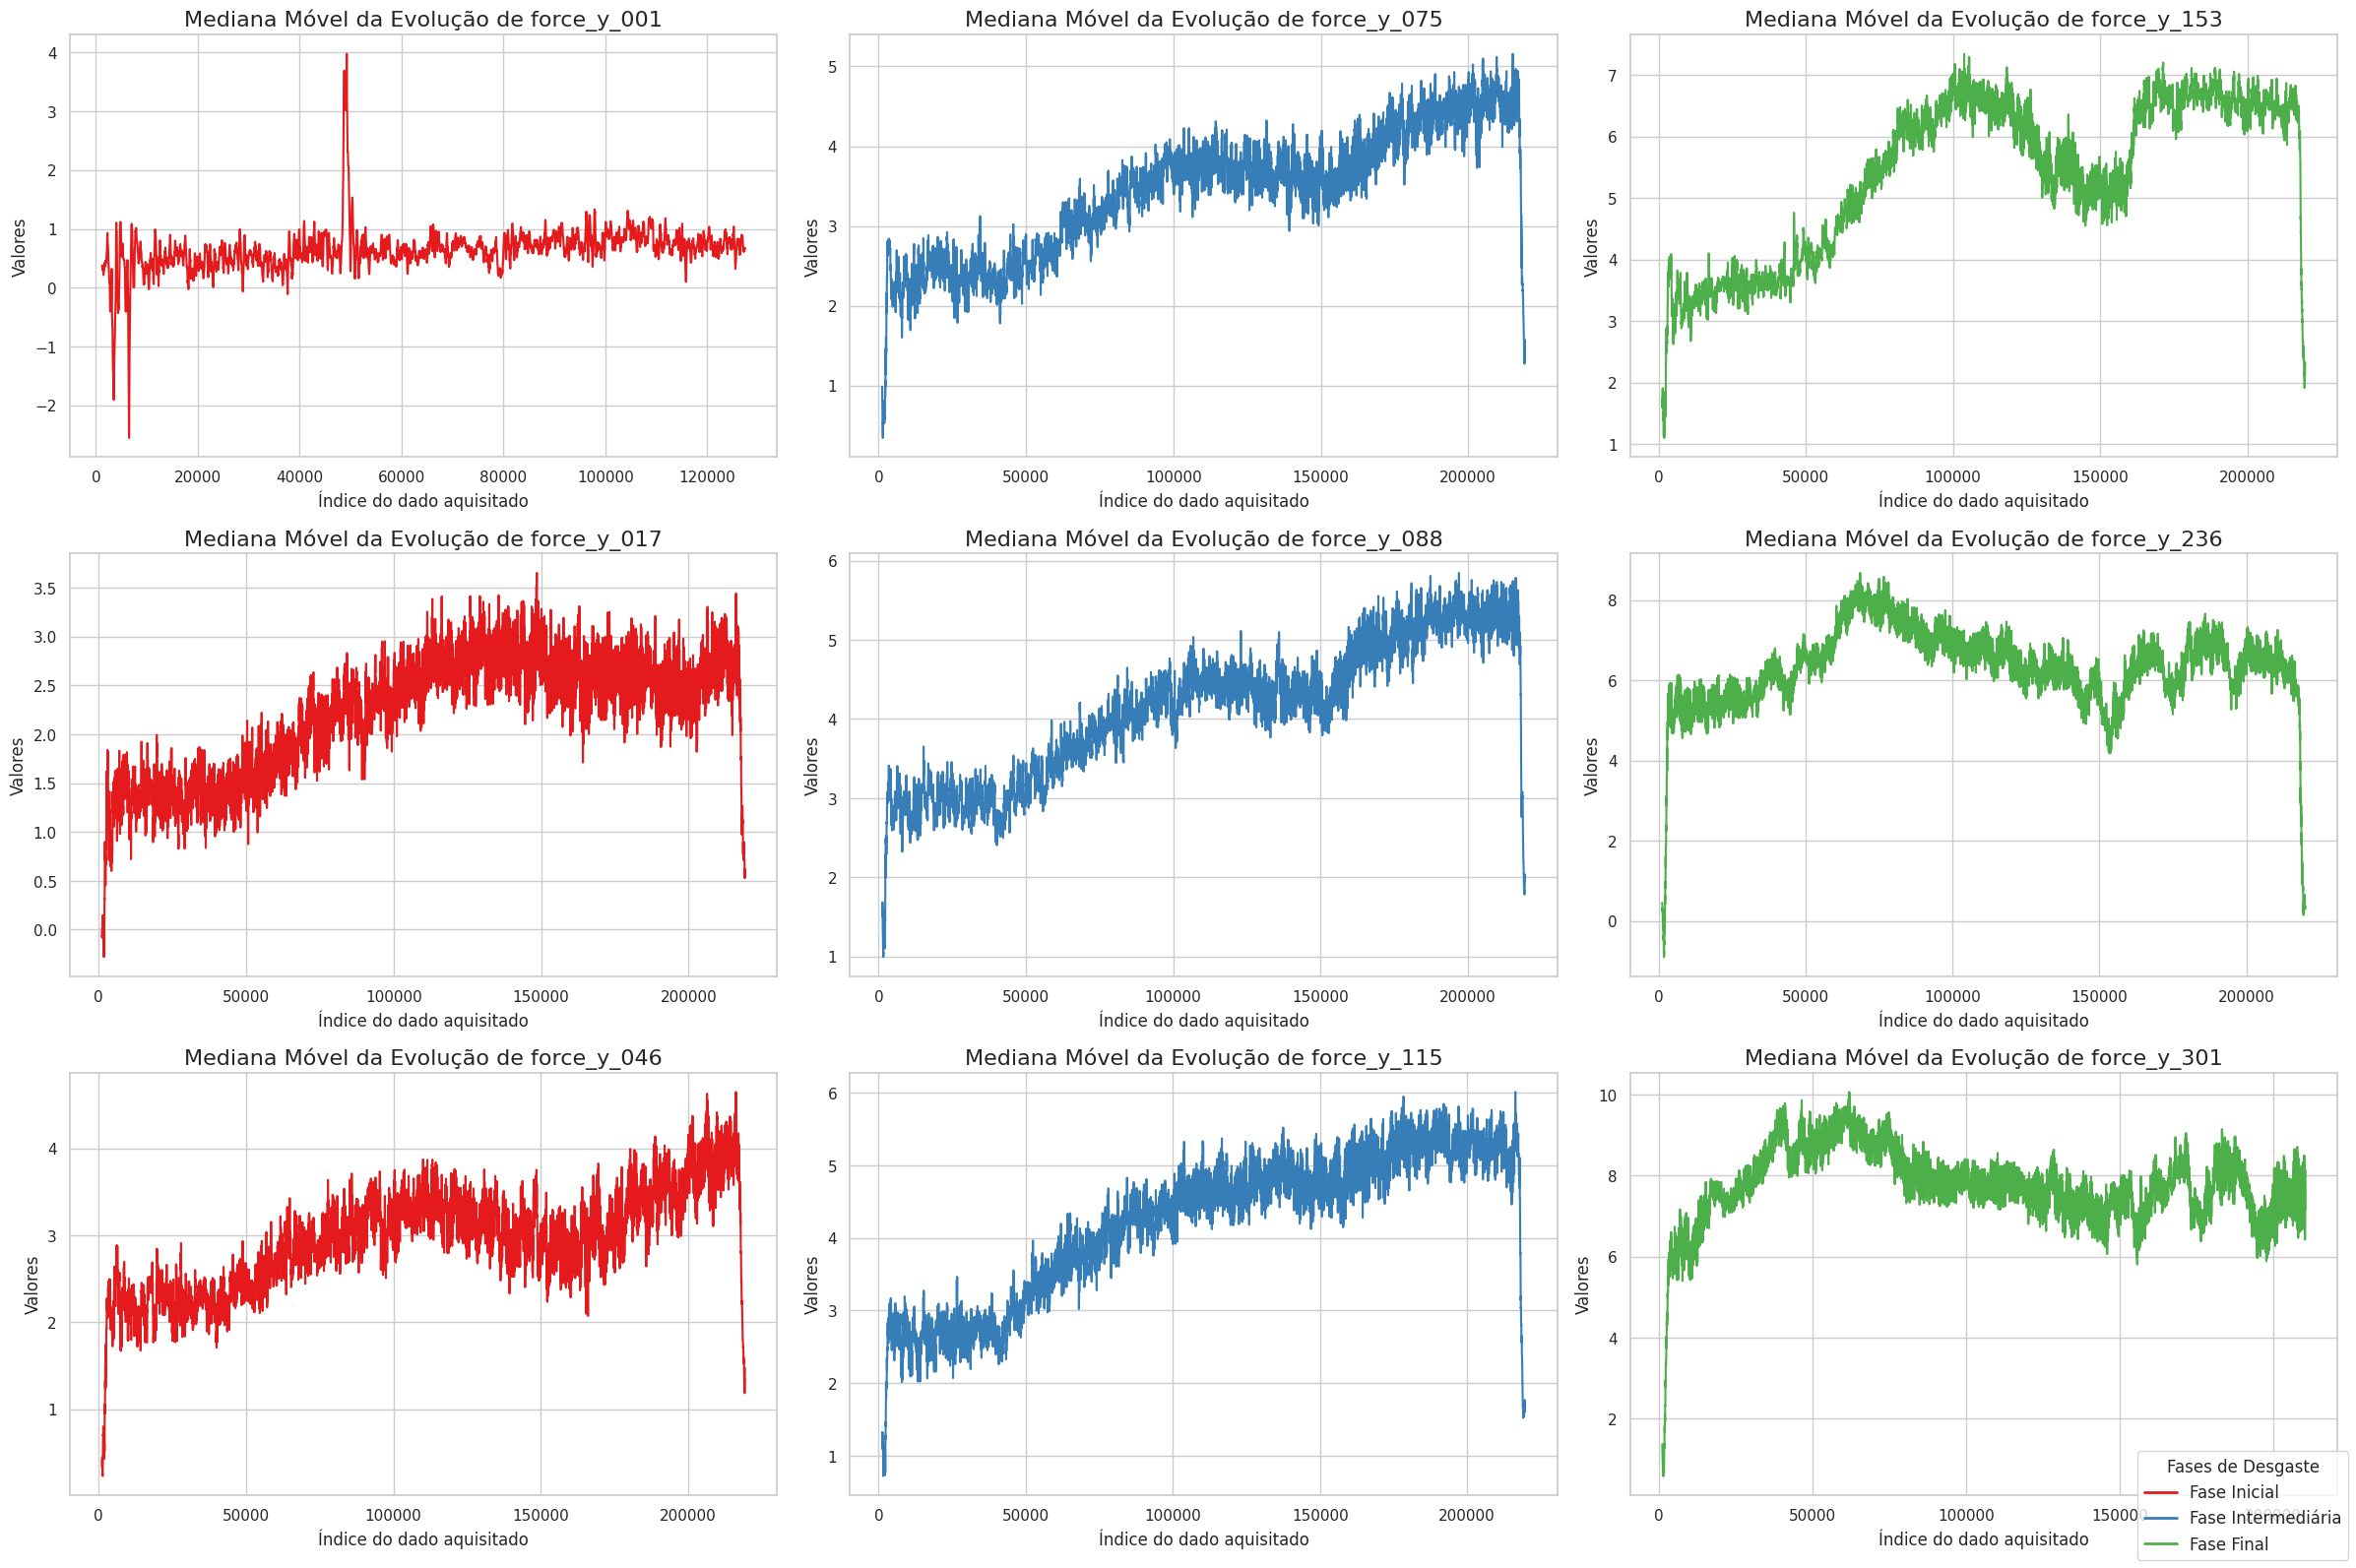

In [29]:
evolucao_por_fase(idxs, 'force_y')

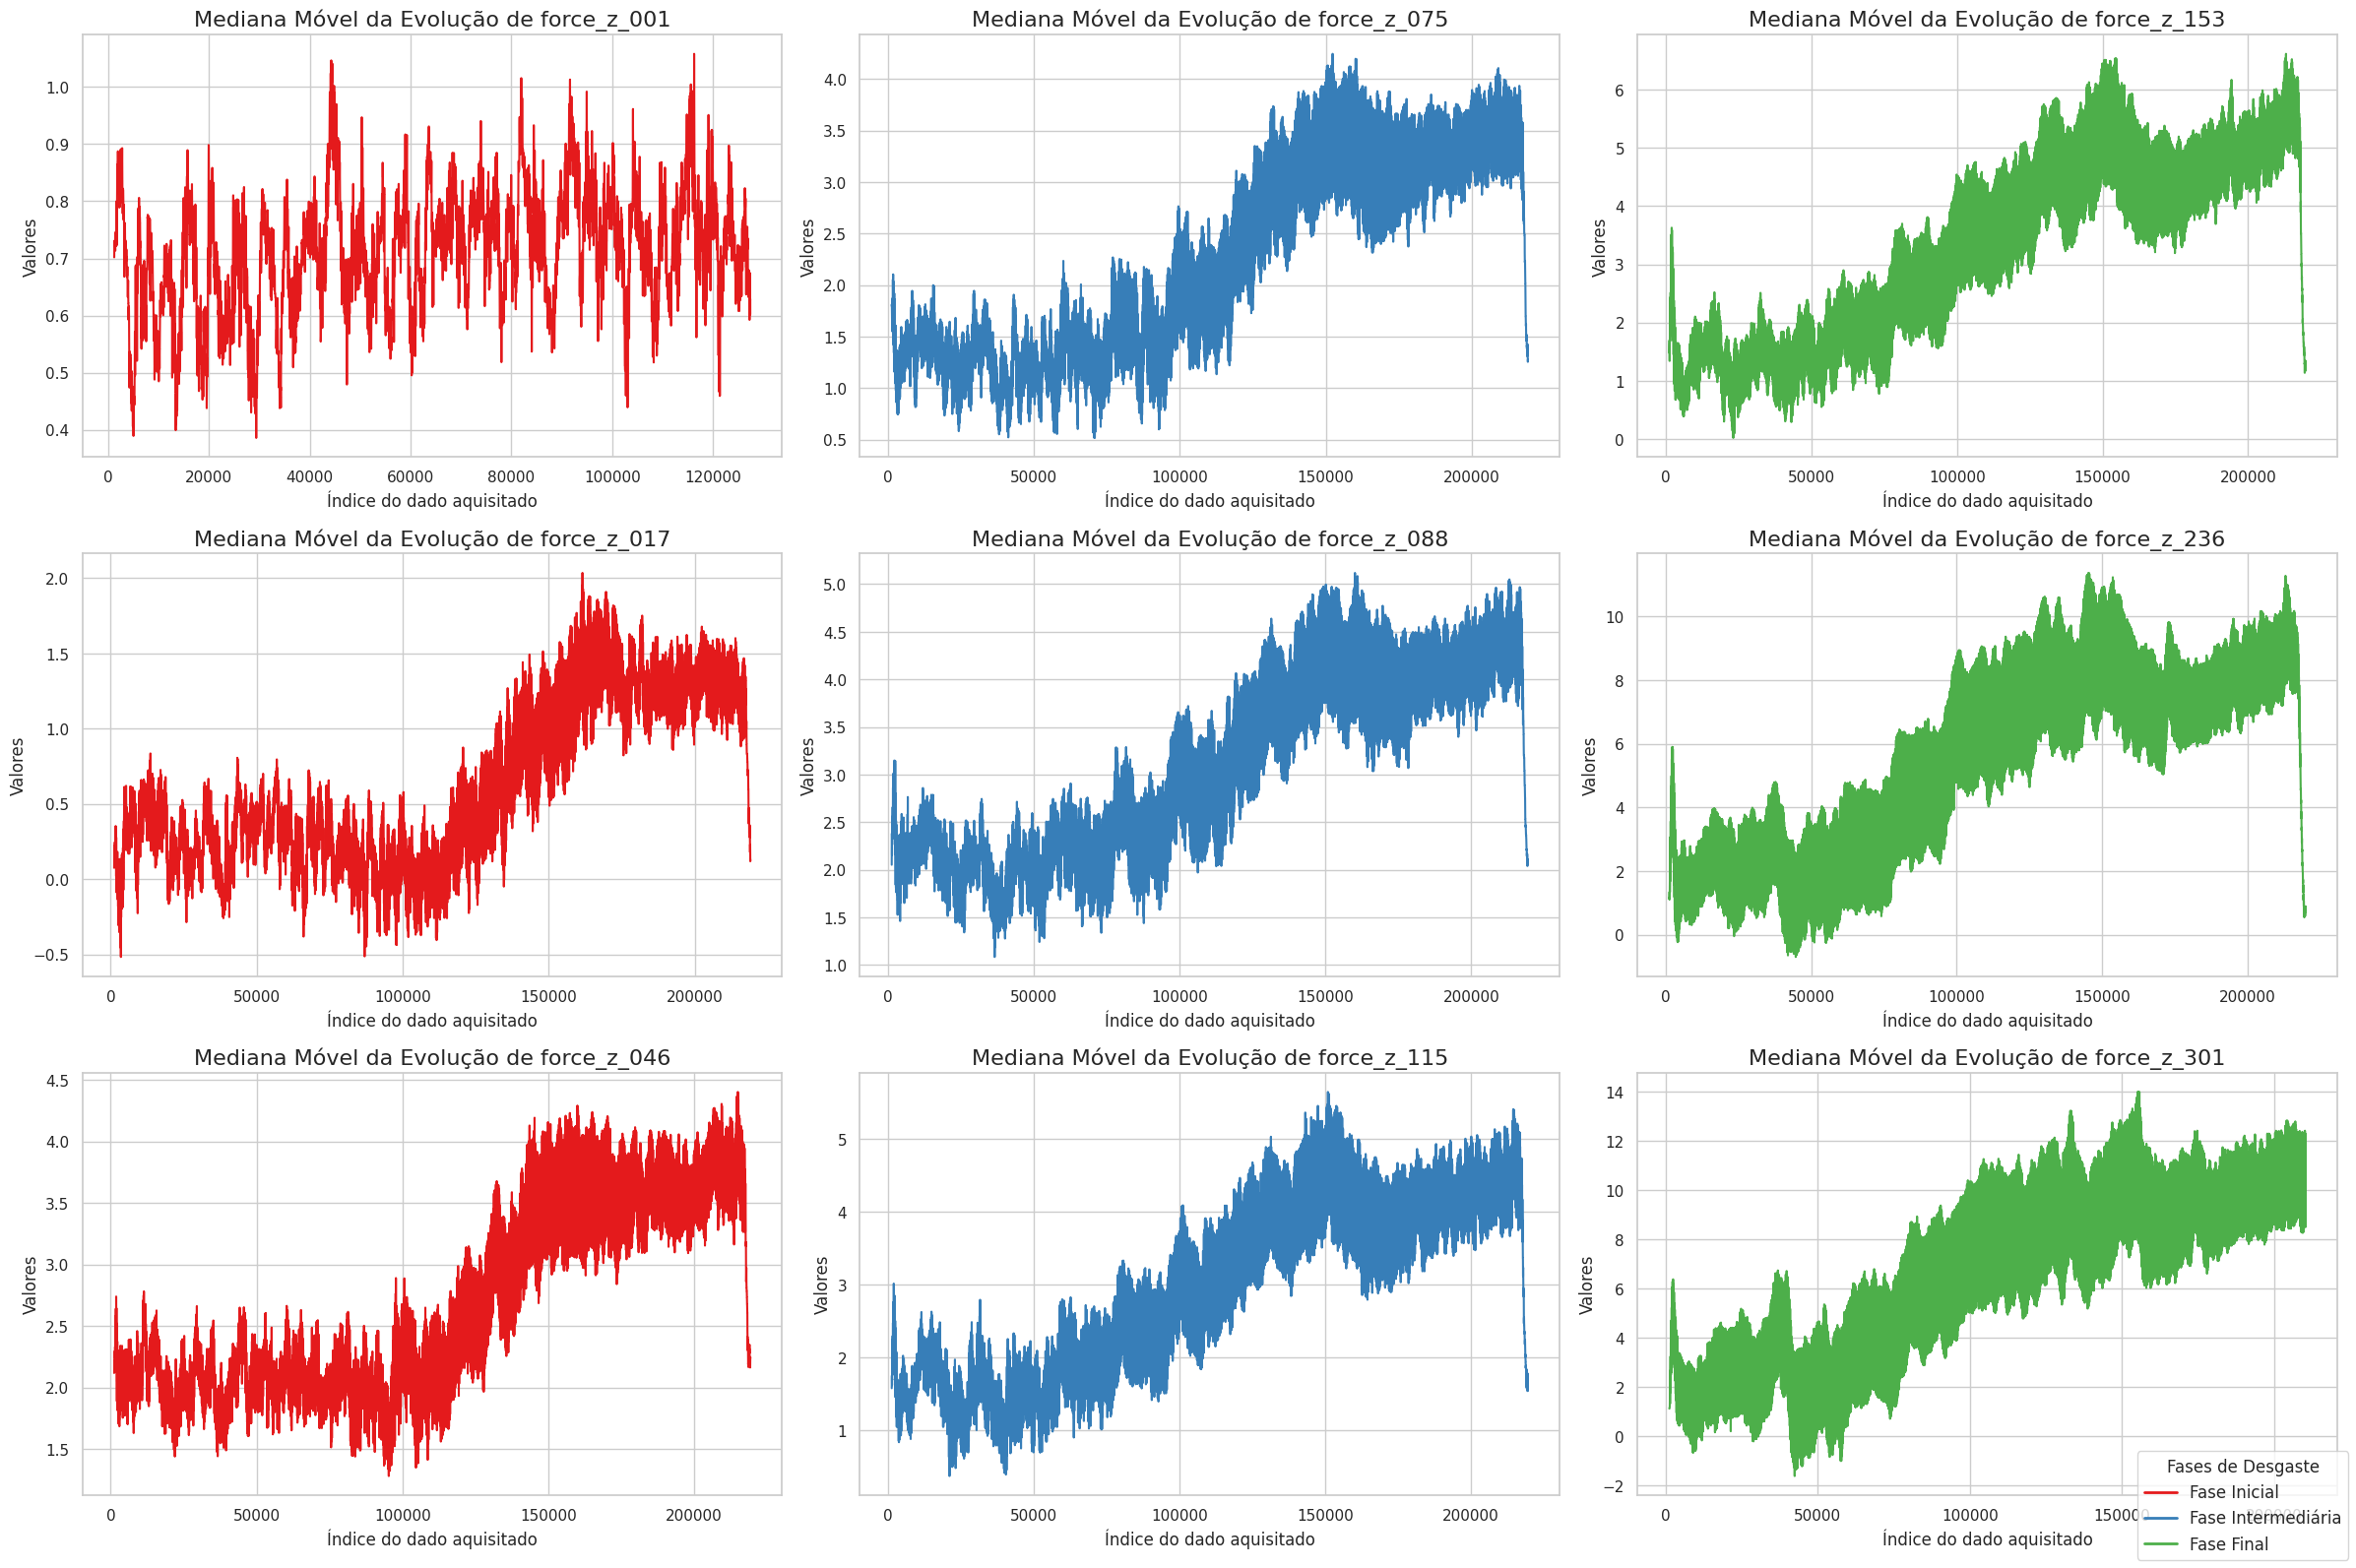

In [30]:
evolucao_por_fase(idxs, 'force_z')

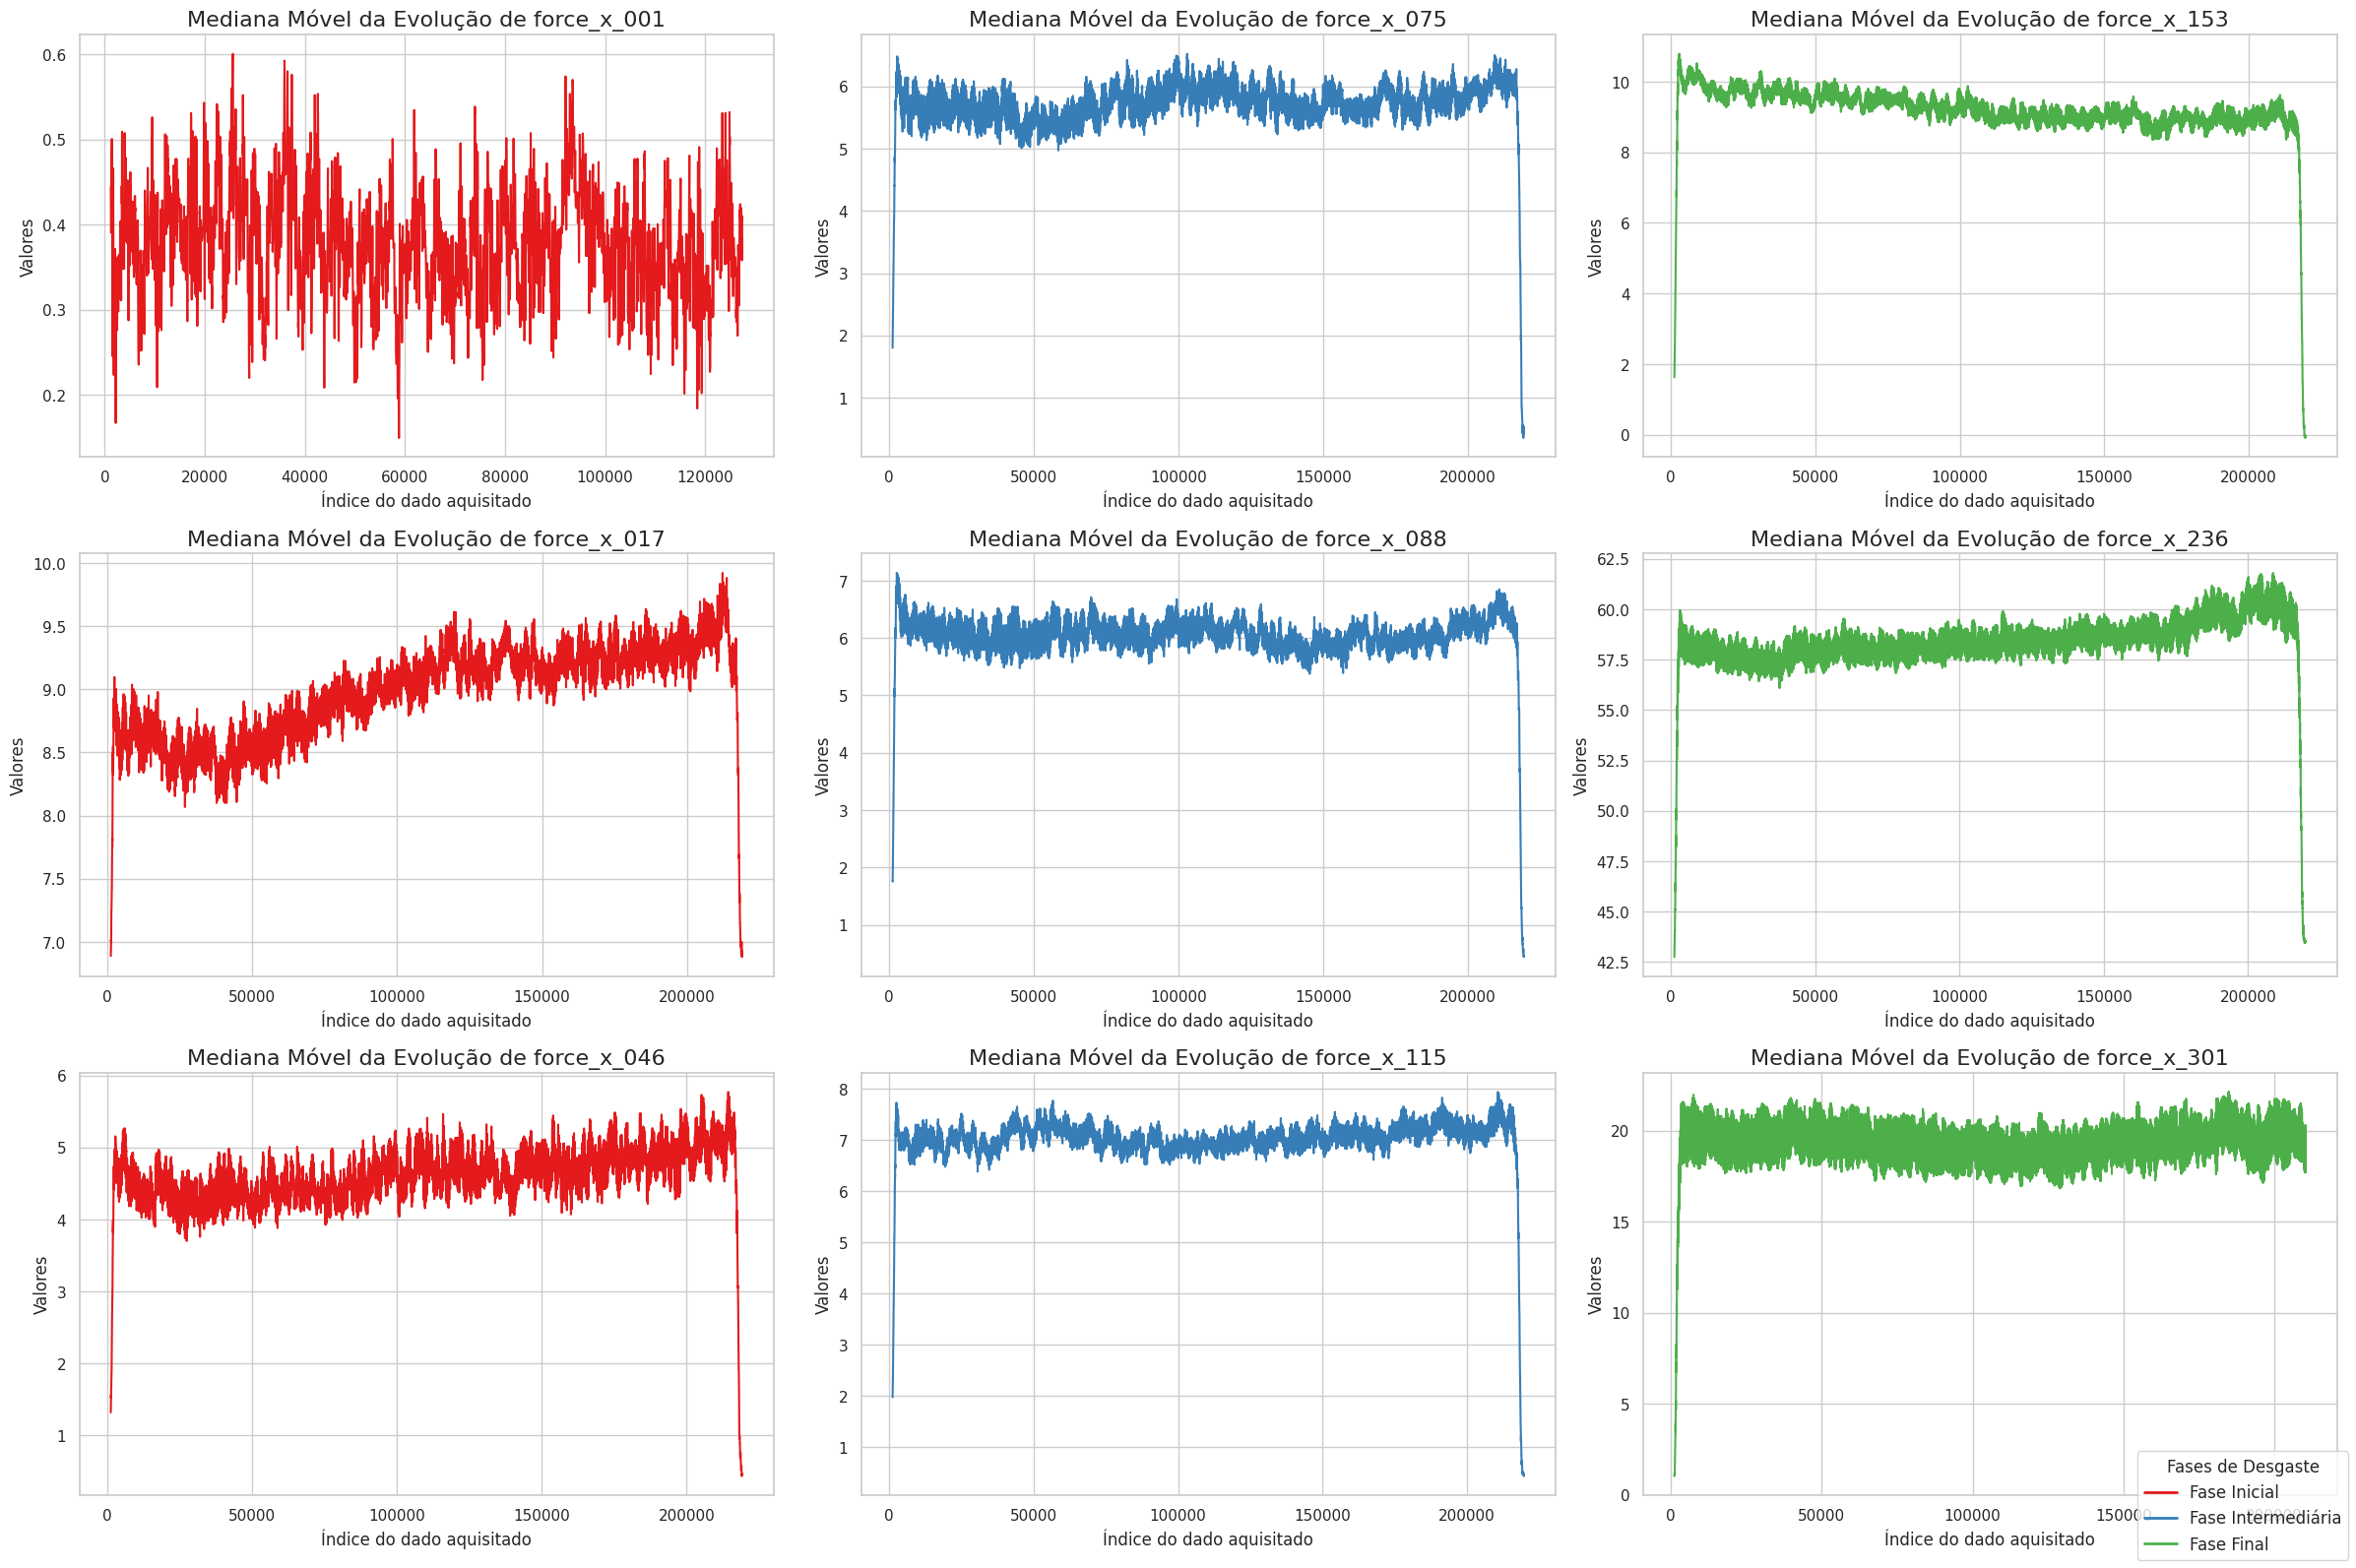

In [31]:
evolucao_por_fase(idxs, 'force_x')

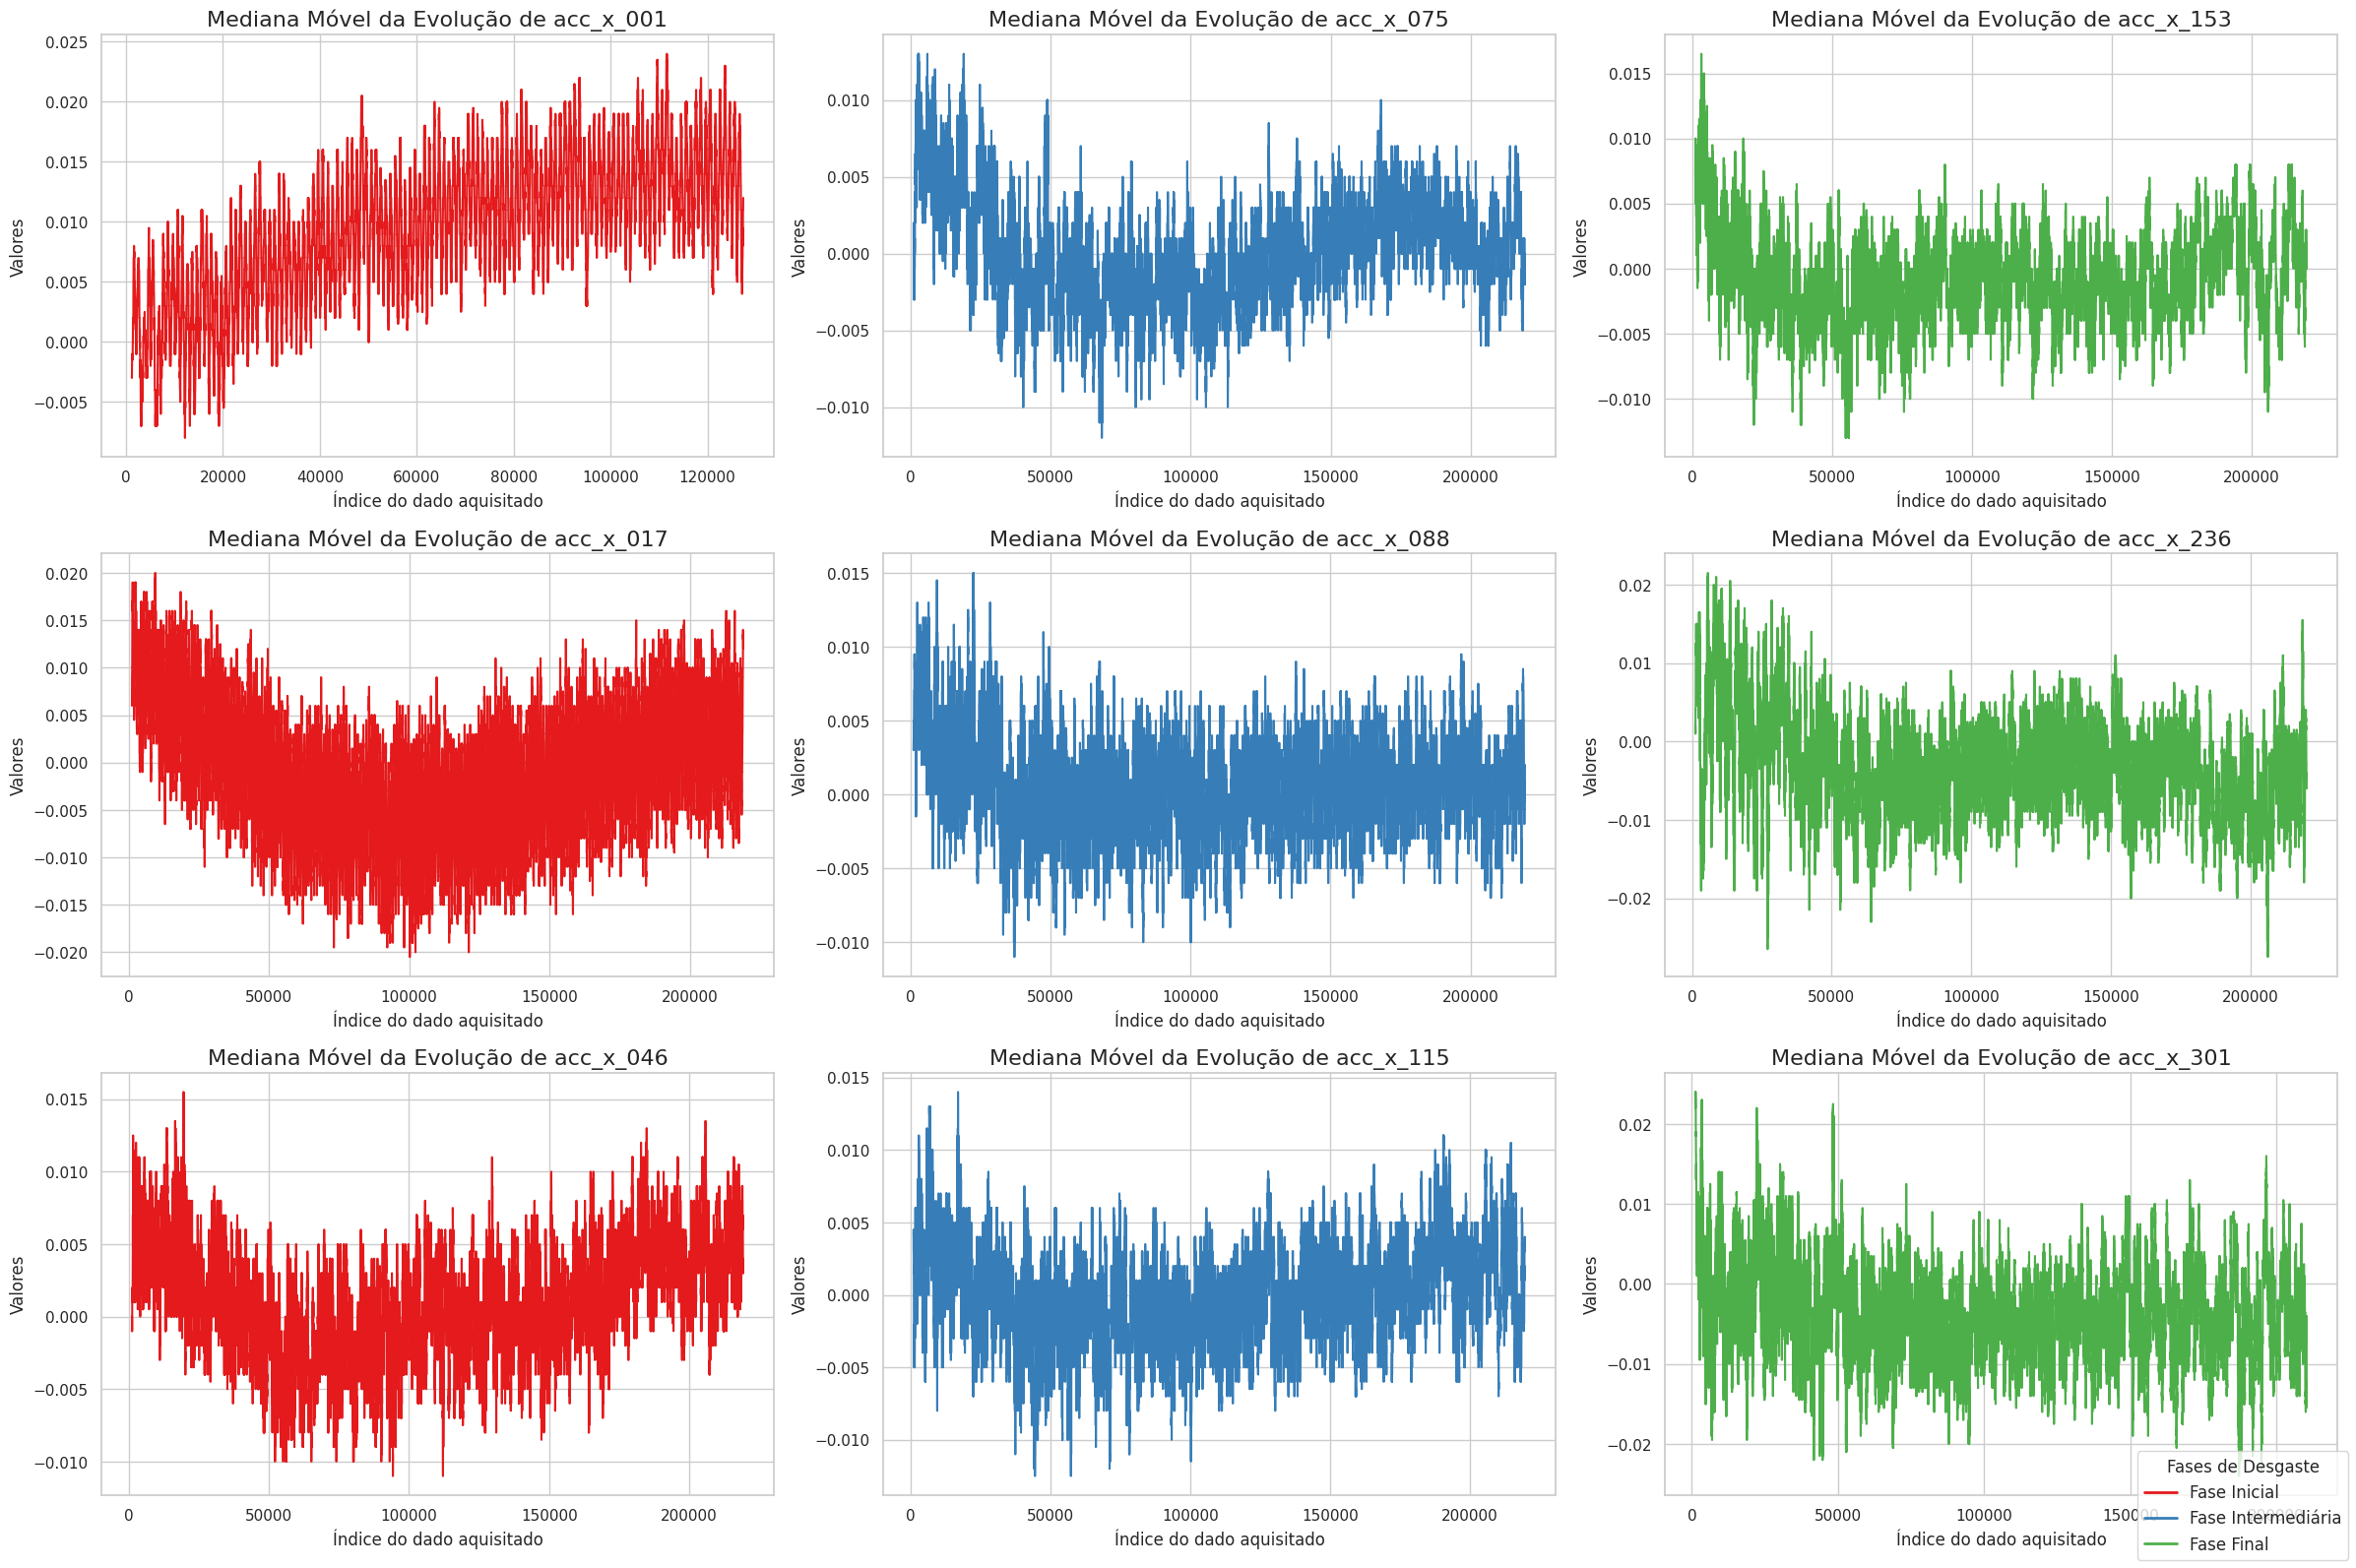

In [32]:
evolucao_por_fase(idxs, 'acc_x')

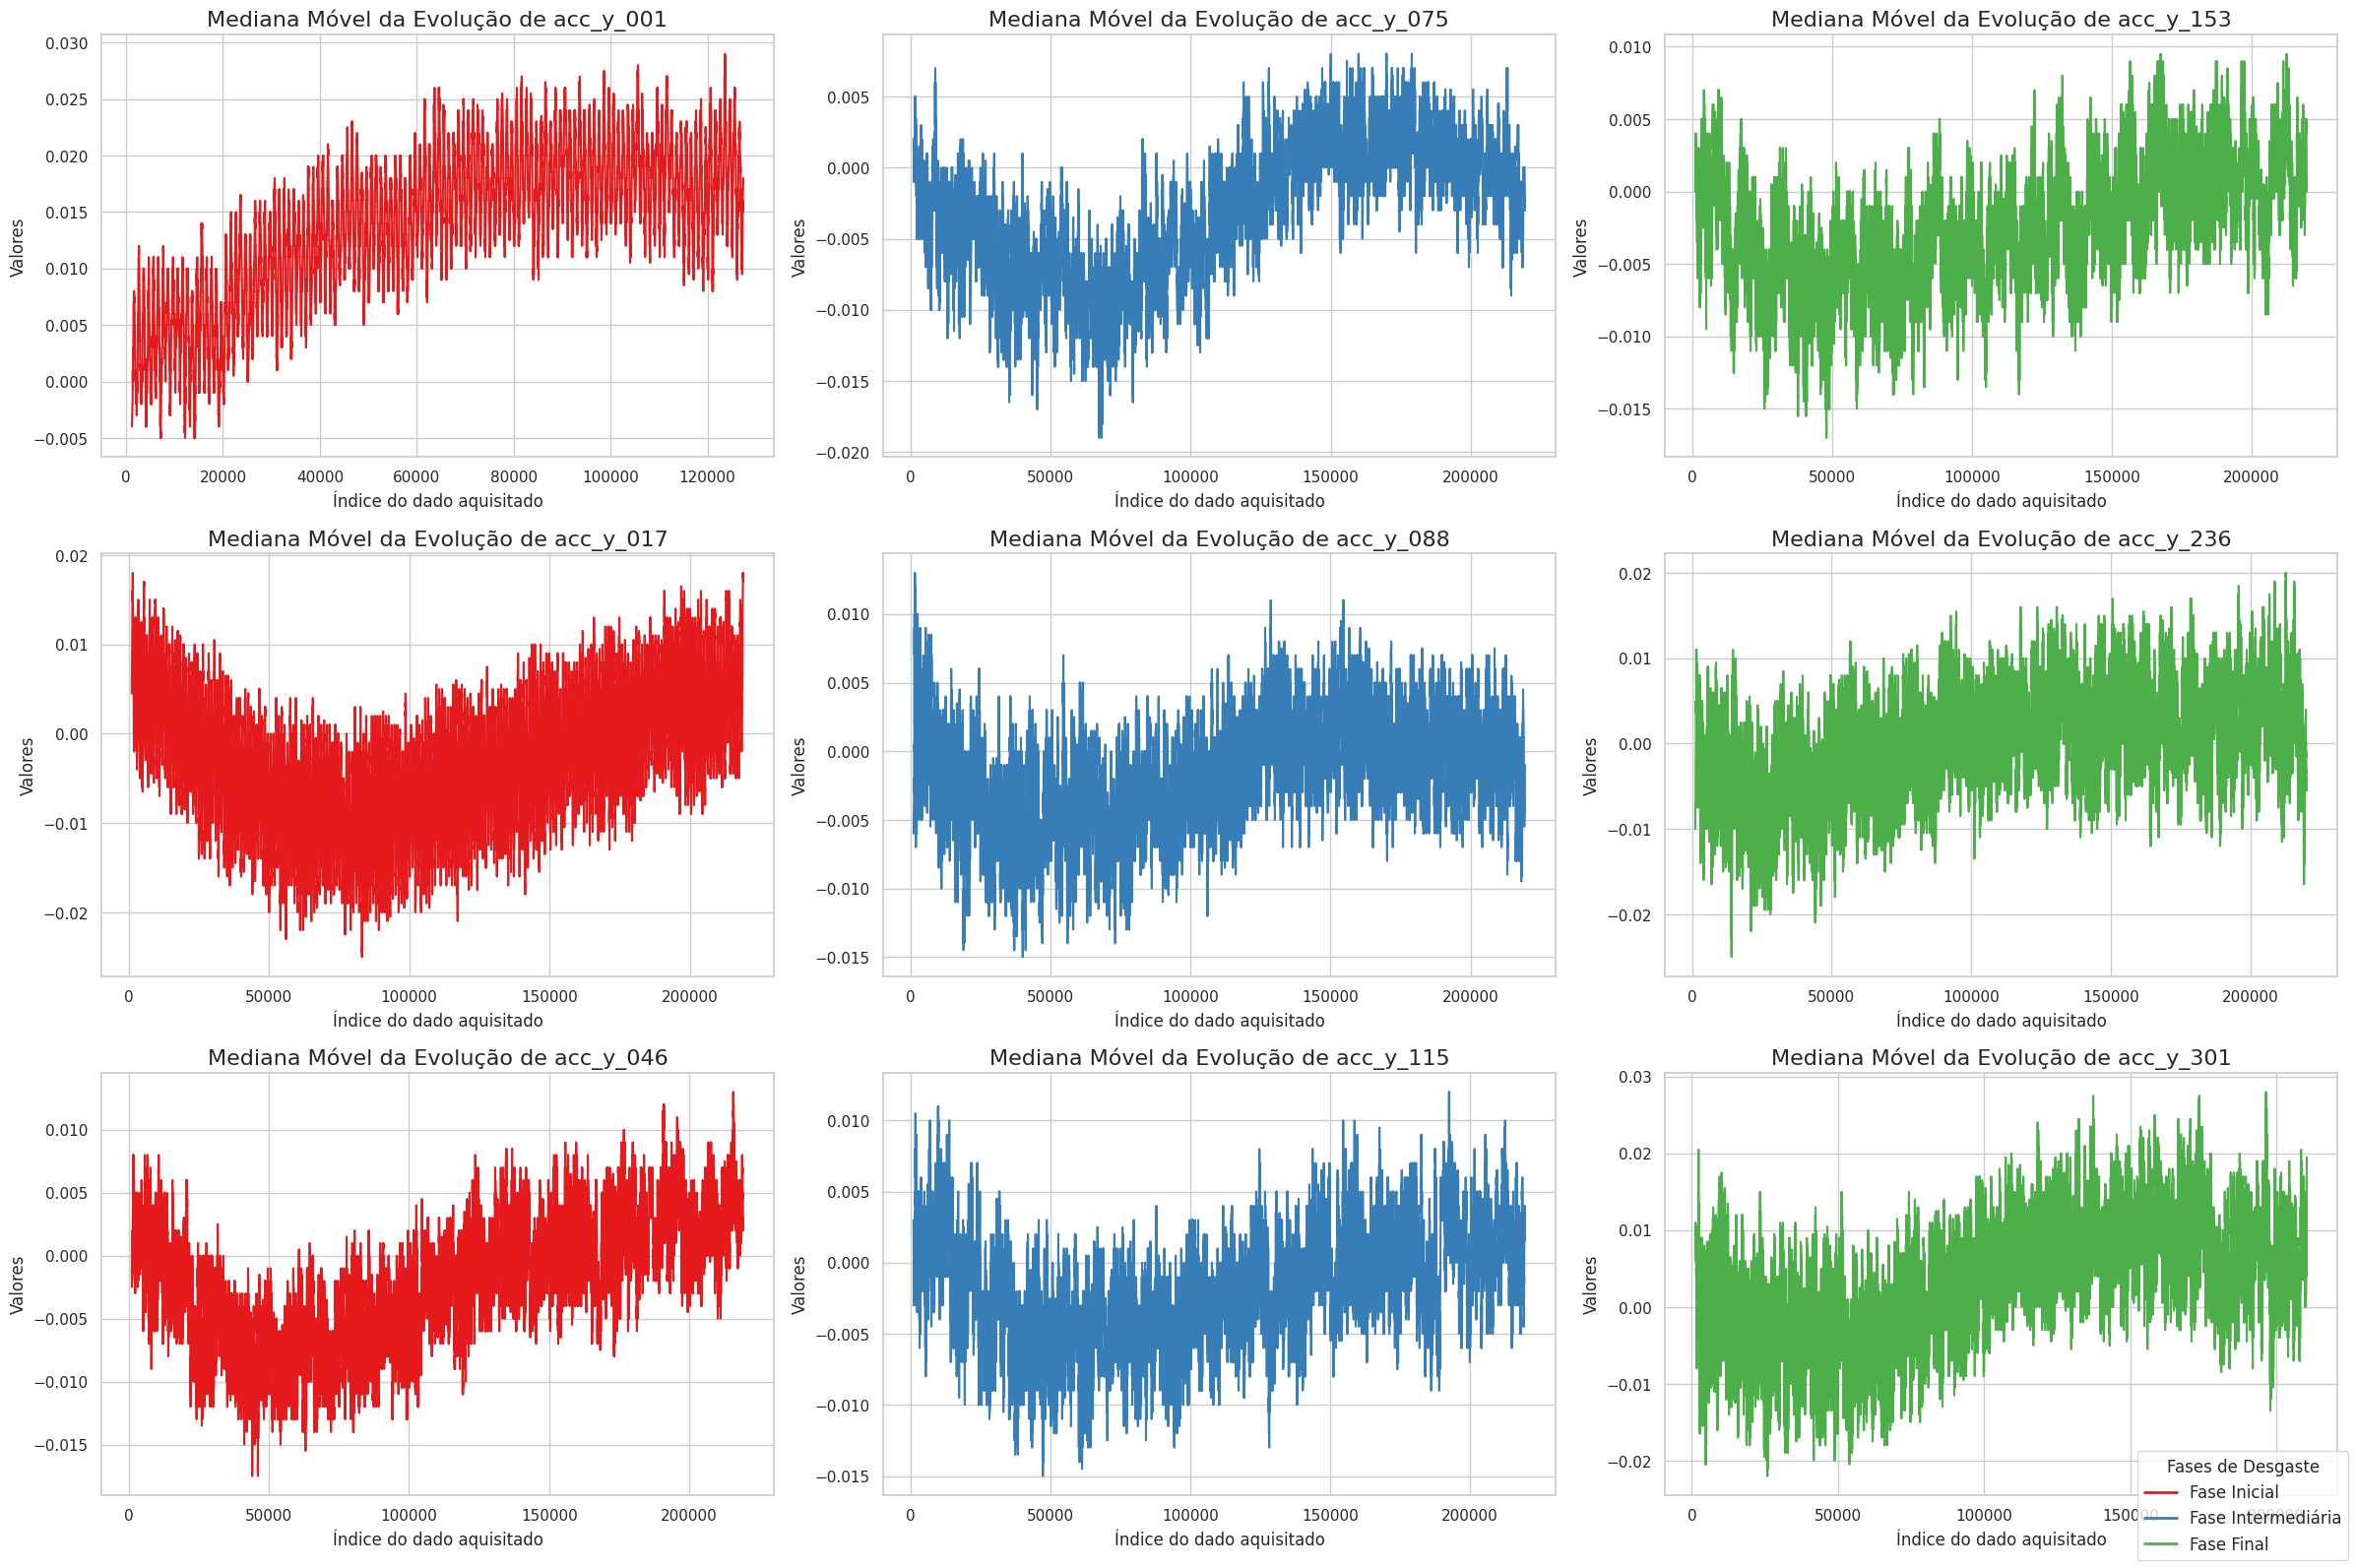

In [33]:
evolucao_por_fase(idxs, 'acc_y')

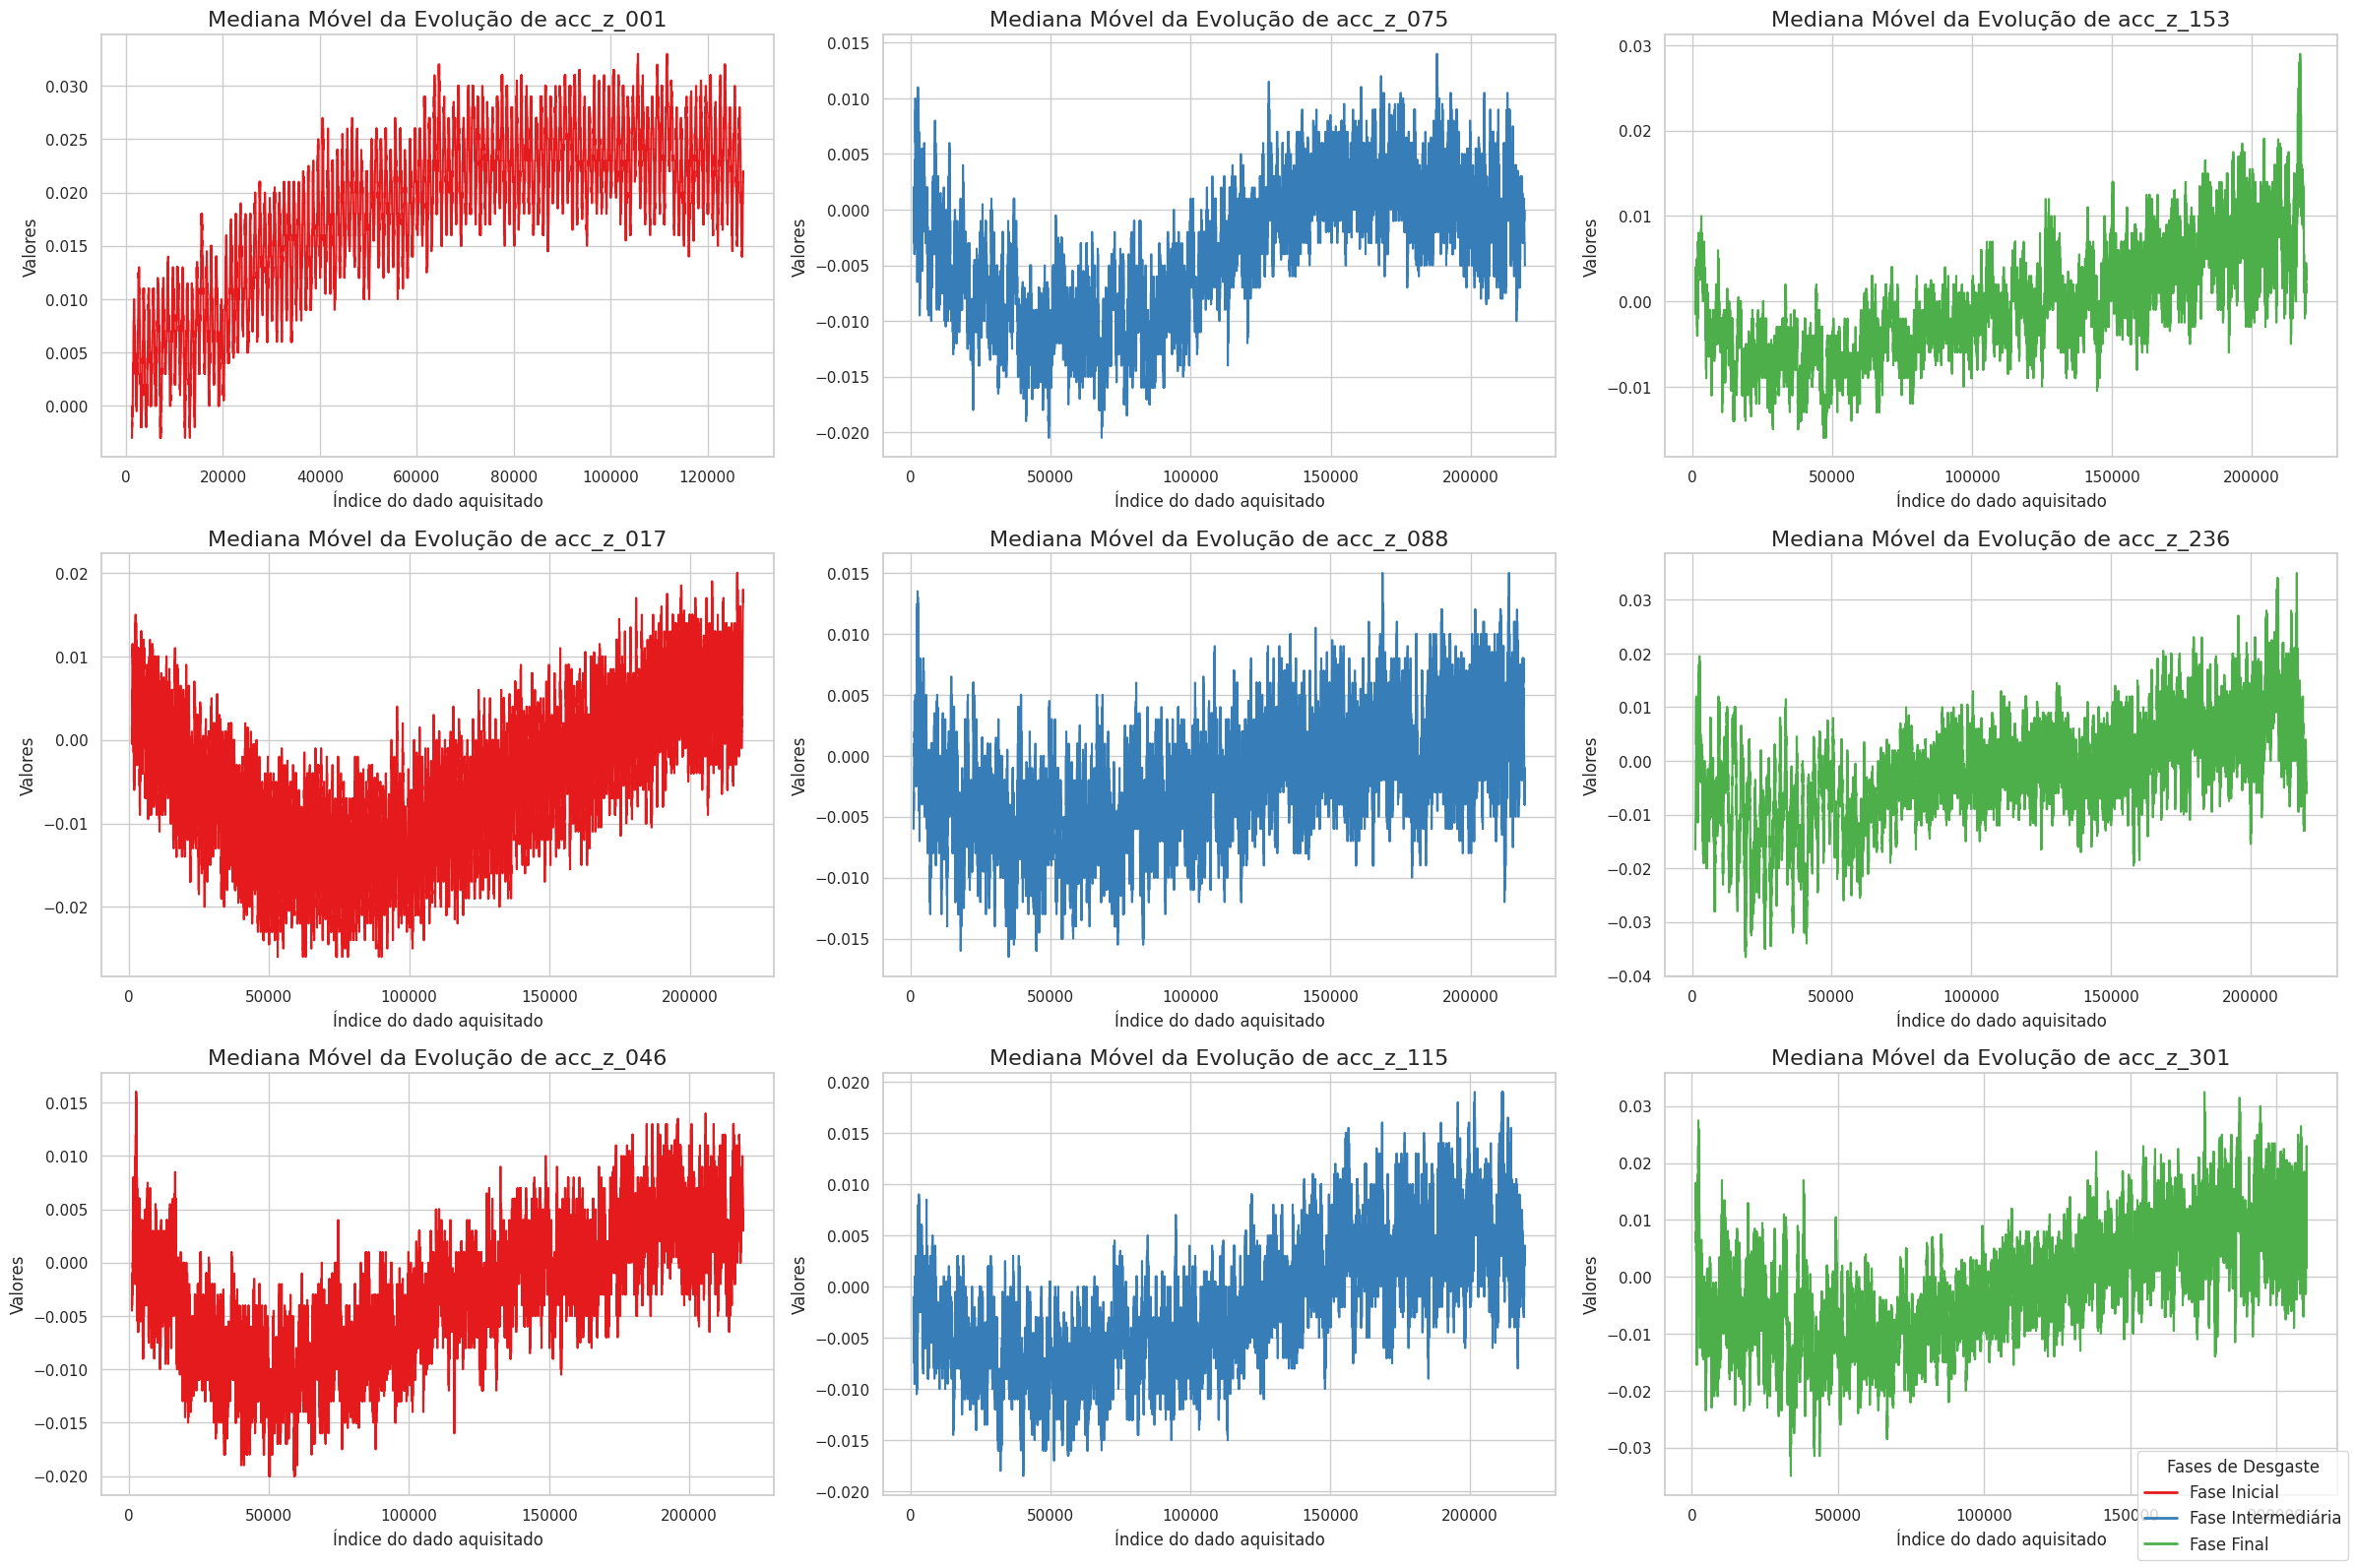

In [34]:
evolucao_por_fase(idxs, 'acc_z')

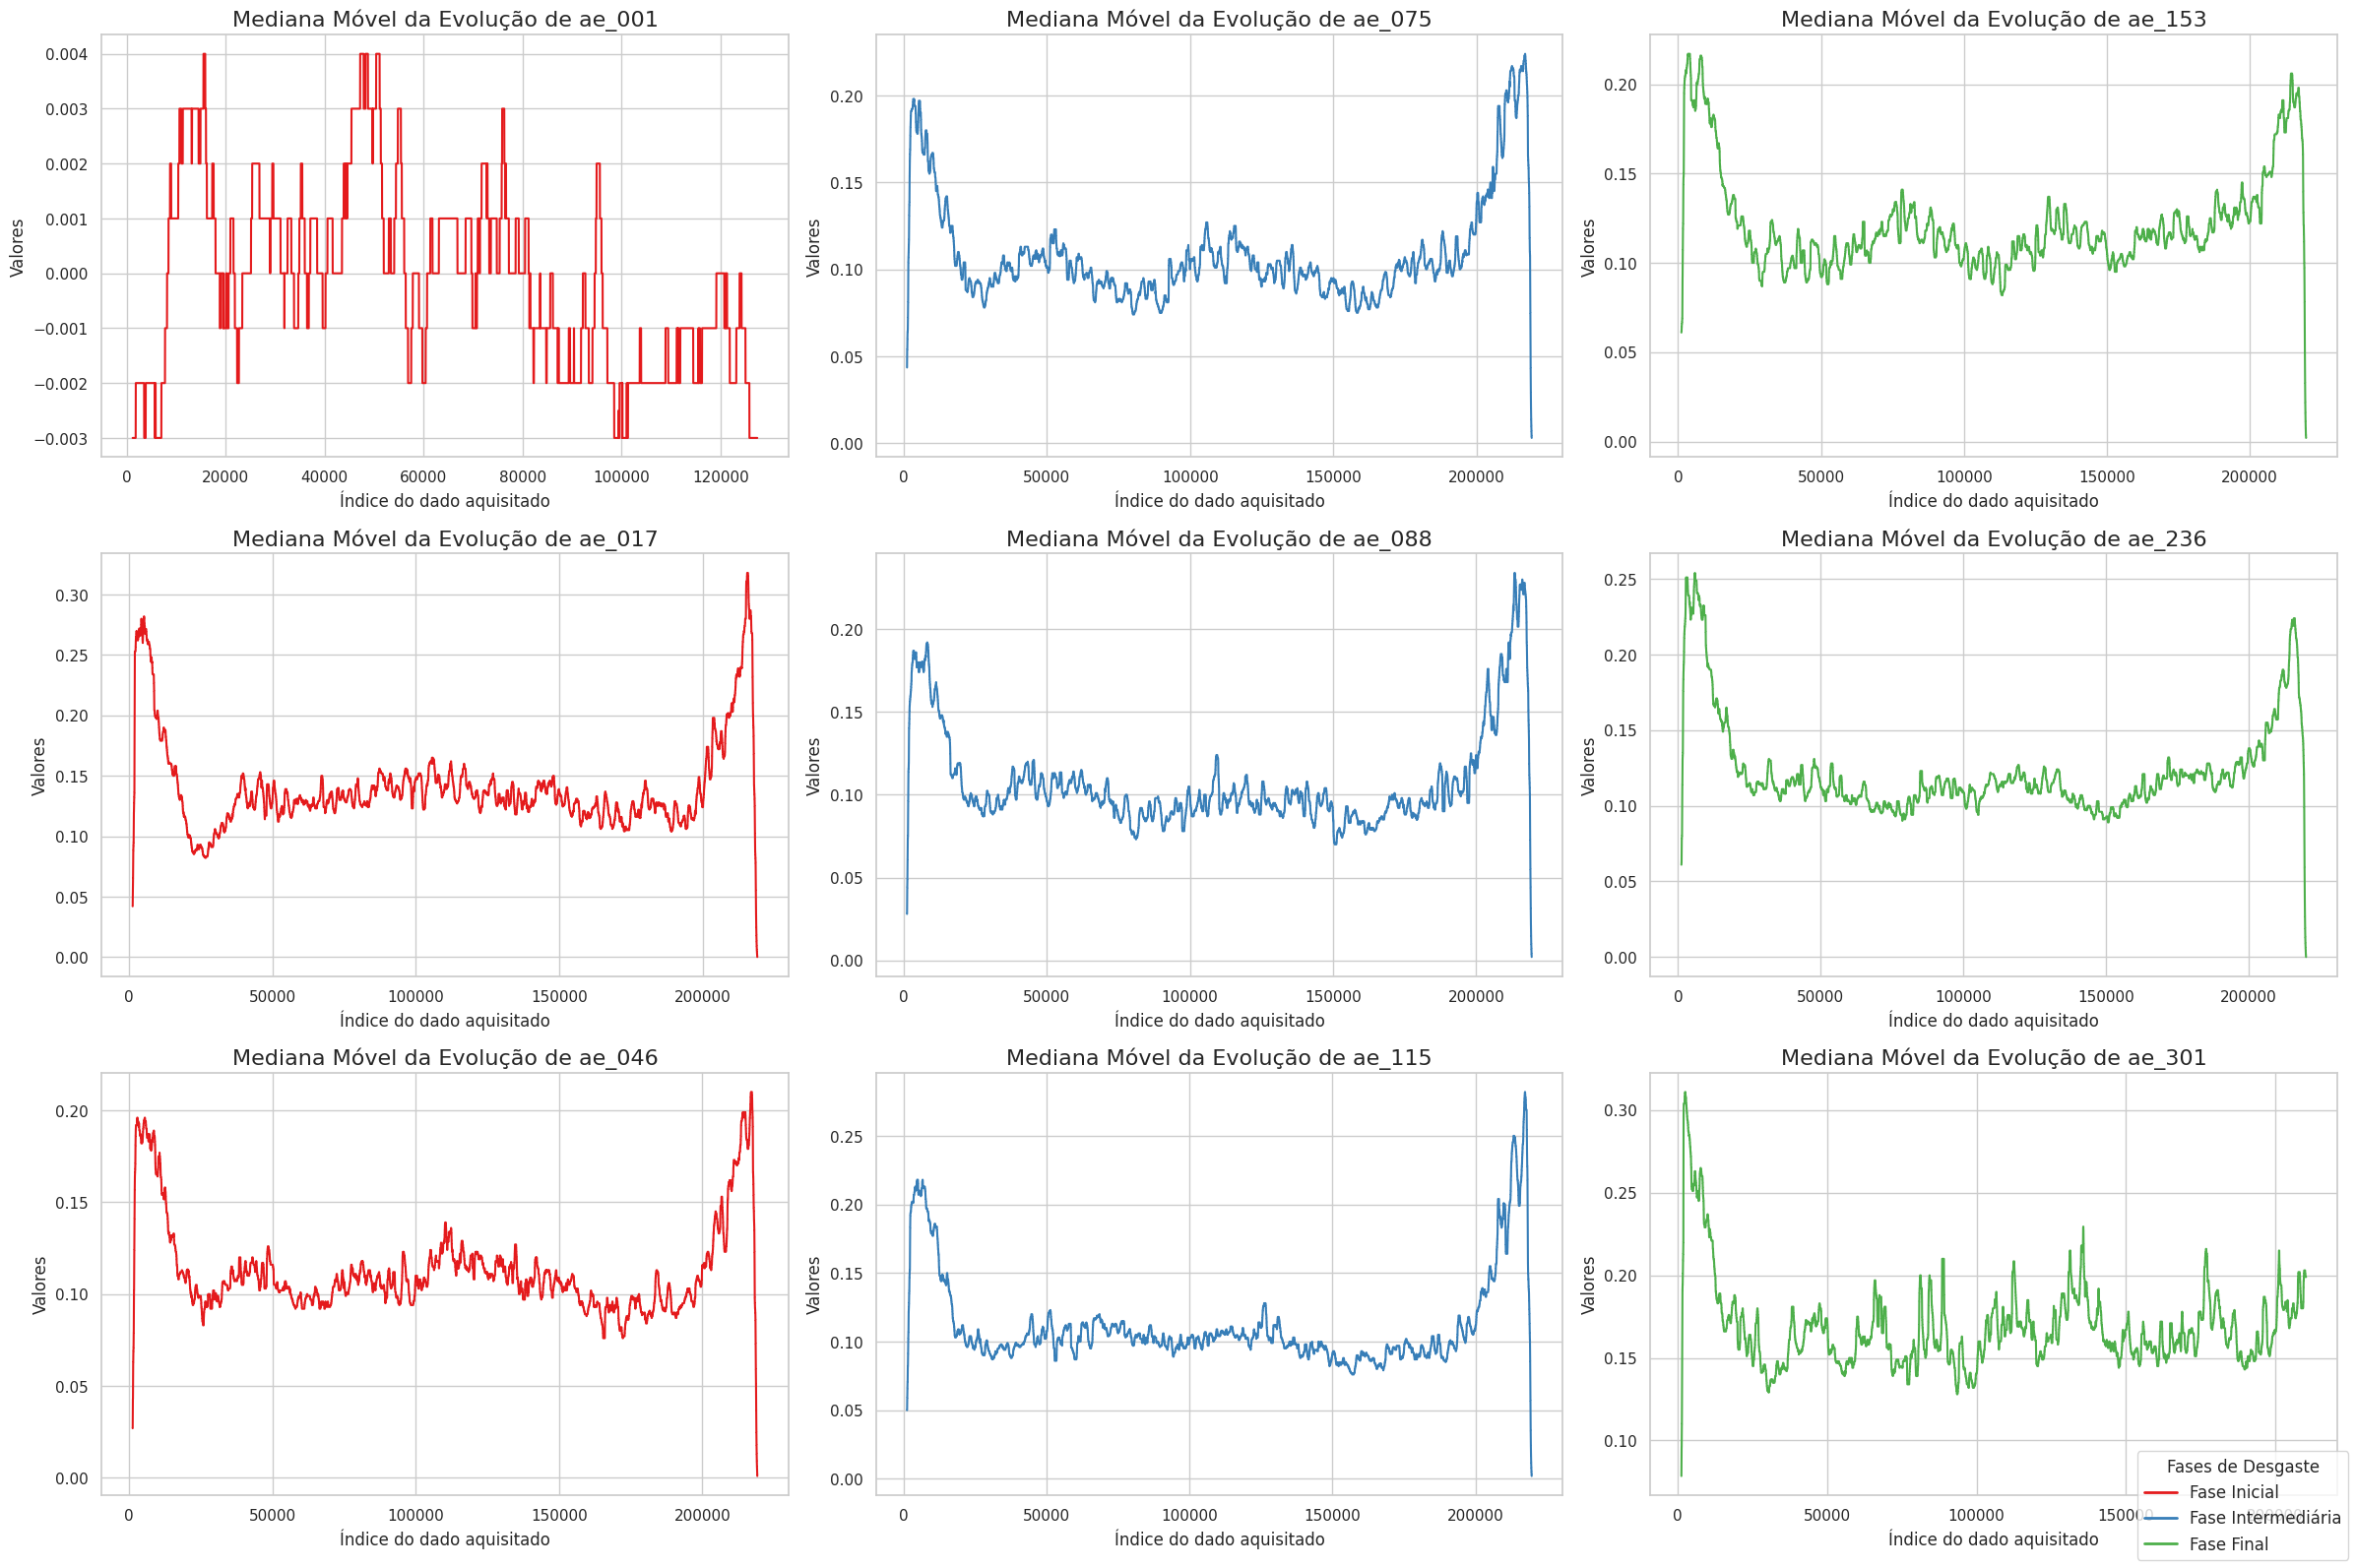

In [35]:
evolucao_por_fase(idxs, 'ae')

#### Parte 3: Distribuição dos dados

Objetivos:
- Avaliar assimetria dos dados
- Perceber a distribuição normal
- Notar outliers na variável usando teorema de Chebyshev

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def distribuicao_por_fase(idxs, variable):
    # Usar o estilo do seaborn
    sns.set(style="whitegrid")

    standard_path = '/content/drive/My Drive/TCC - Desenvolvimento/c1/'

    # Definir a organização dos subplots (3x3) com um tamanho adequado
    fig, axs = plt.subplots(3, 3, figsize=(24, 16))

    # Definir uma paleta de cores para as colunas dos gráficos
    colors = sns.color_palette("Set1", n_colors=3)  # Paleta com 3 cores distintas

    # Criar handles para a legenda das fases (vermelho = fase 1, azul = fase 2, verde = fase 3)
    handles = [plt.Line2D([0], [0], color=colors[0], lw=2, label='Fase Inicial'),
              plt.Line2D([0], [0], color=colors[1], lw=2, label='Fase Intermediária'),
              plt.Line2D([0], [0], color=colors[2], lw=2, label='Fase Final')]

    # Iterar sobre os índices e eixos dos subplots
    for idx, i in enumerate(idxs):
        # Definir filepath
        filepath = standard_path + f'c_1_{i:03d}.csv'

        # Verificar se o arquivo existe
        try:
            df = pd.read_csv(filepath, header=None)
        except FileNotFoundError:
            print(f"Arquivo não encontrado: {filepath}")
            continue  # Pula para o próximo índice se o arquivo não existir

        # Renomear as colunas
        cols = (
            [f'force_x_{i:03d}'] +
            [f'force_y_{i:03d}'] +
            [f'force_z_{i:03d}'] +
            [f'acc_x_{i:03d}'] +
            [f'acc_y_{i:03d}'] +
            [f'acc_z_{i:03d}'] +
            [f'ae_{i:03d}'])
        df.columns = cols  # Aplicar os nomes de colunas ao DataFrame

        # Renomear a variável segundo os cortes selecionados
        variable_id = variable + f'_{i:03d}'

        media = df[variable_id].mean()
        desvio_padrao = df[variable_id].std()

        # Definir os limites
        limite_min = media - 4*desvio_padrao
        limite_max = media + 4*desvio_padrao

        # Definir a posição do subplot (linha, coluna) na matriz 3x3
        col = idx // 3
        row = idx % 3

        # Plotar o gráfico kdeplot com sombreamento e adicionar as linhas verticais
        if variable_id in df.columns:
            sns.kdeplot(
                df[variable_id],
                ax=axs[row, col],
                color=colors[col],  # Aplicar cor diferente para cada coluna
                fill=True  # Sombreamento sob a curva
            )

            # Adicionar linhas verticais representando os limites
            axs[row, col].axvline(limite_min, color='red', linestyle='dashed', linewidth=2)
            axs[row, col].axvline(limite_max, color='green', linestyle='dashed', linewidth=2)
            axs[row, col].axvline(media, color='orange', linestyle='dashed', linewidth=2)

            axs[row, col].set_title(f'Distribuição de {variable_id}', fontsize=14)
        else:
            print(f"Variável {variable_id} não encontrada no arquivo {filepath}")

        # Configurar legendas e rótulos dos eixos
        axs[row, col].set_ylabel("Valores", fontsize=12)

    # Adicionar legenda personalizada ao gráfico (fora do grid)
    fig.legend(handles=handles, loc='upper right', fontsize=12, title='Fases de Desgaste')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

    return None


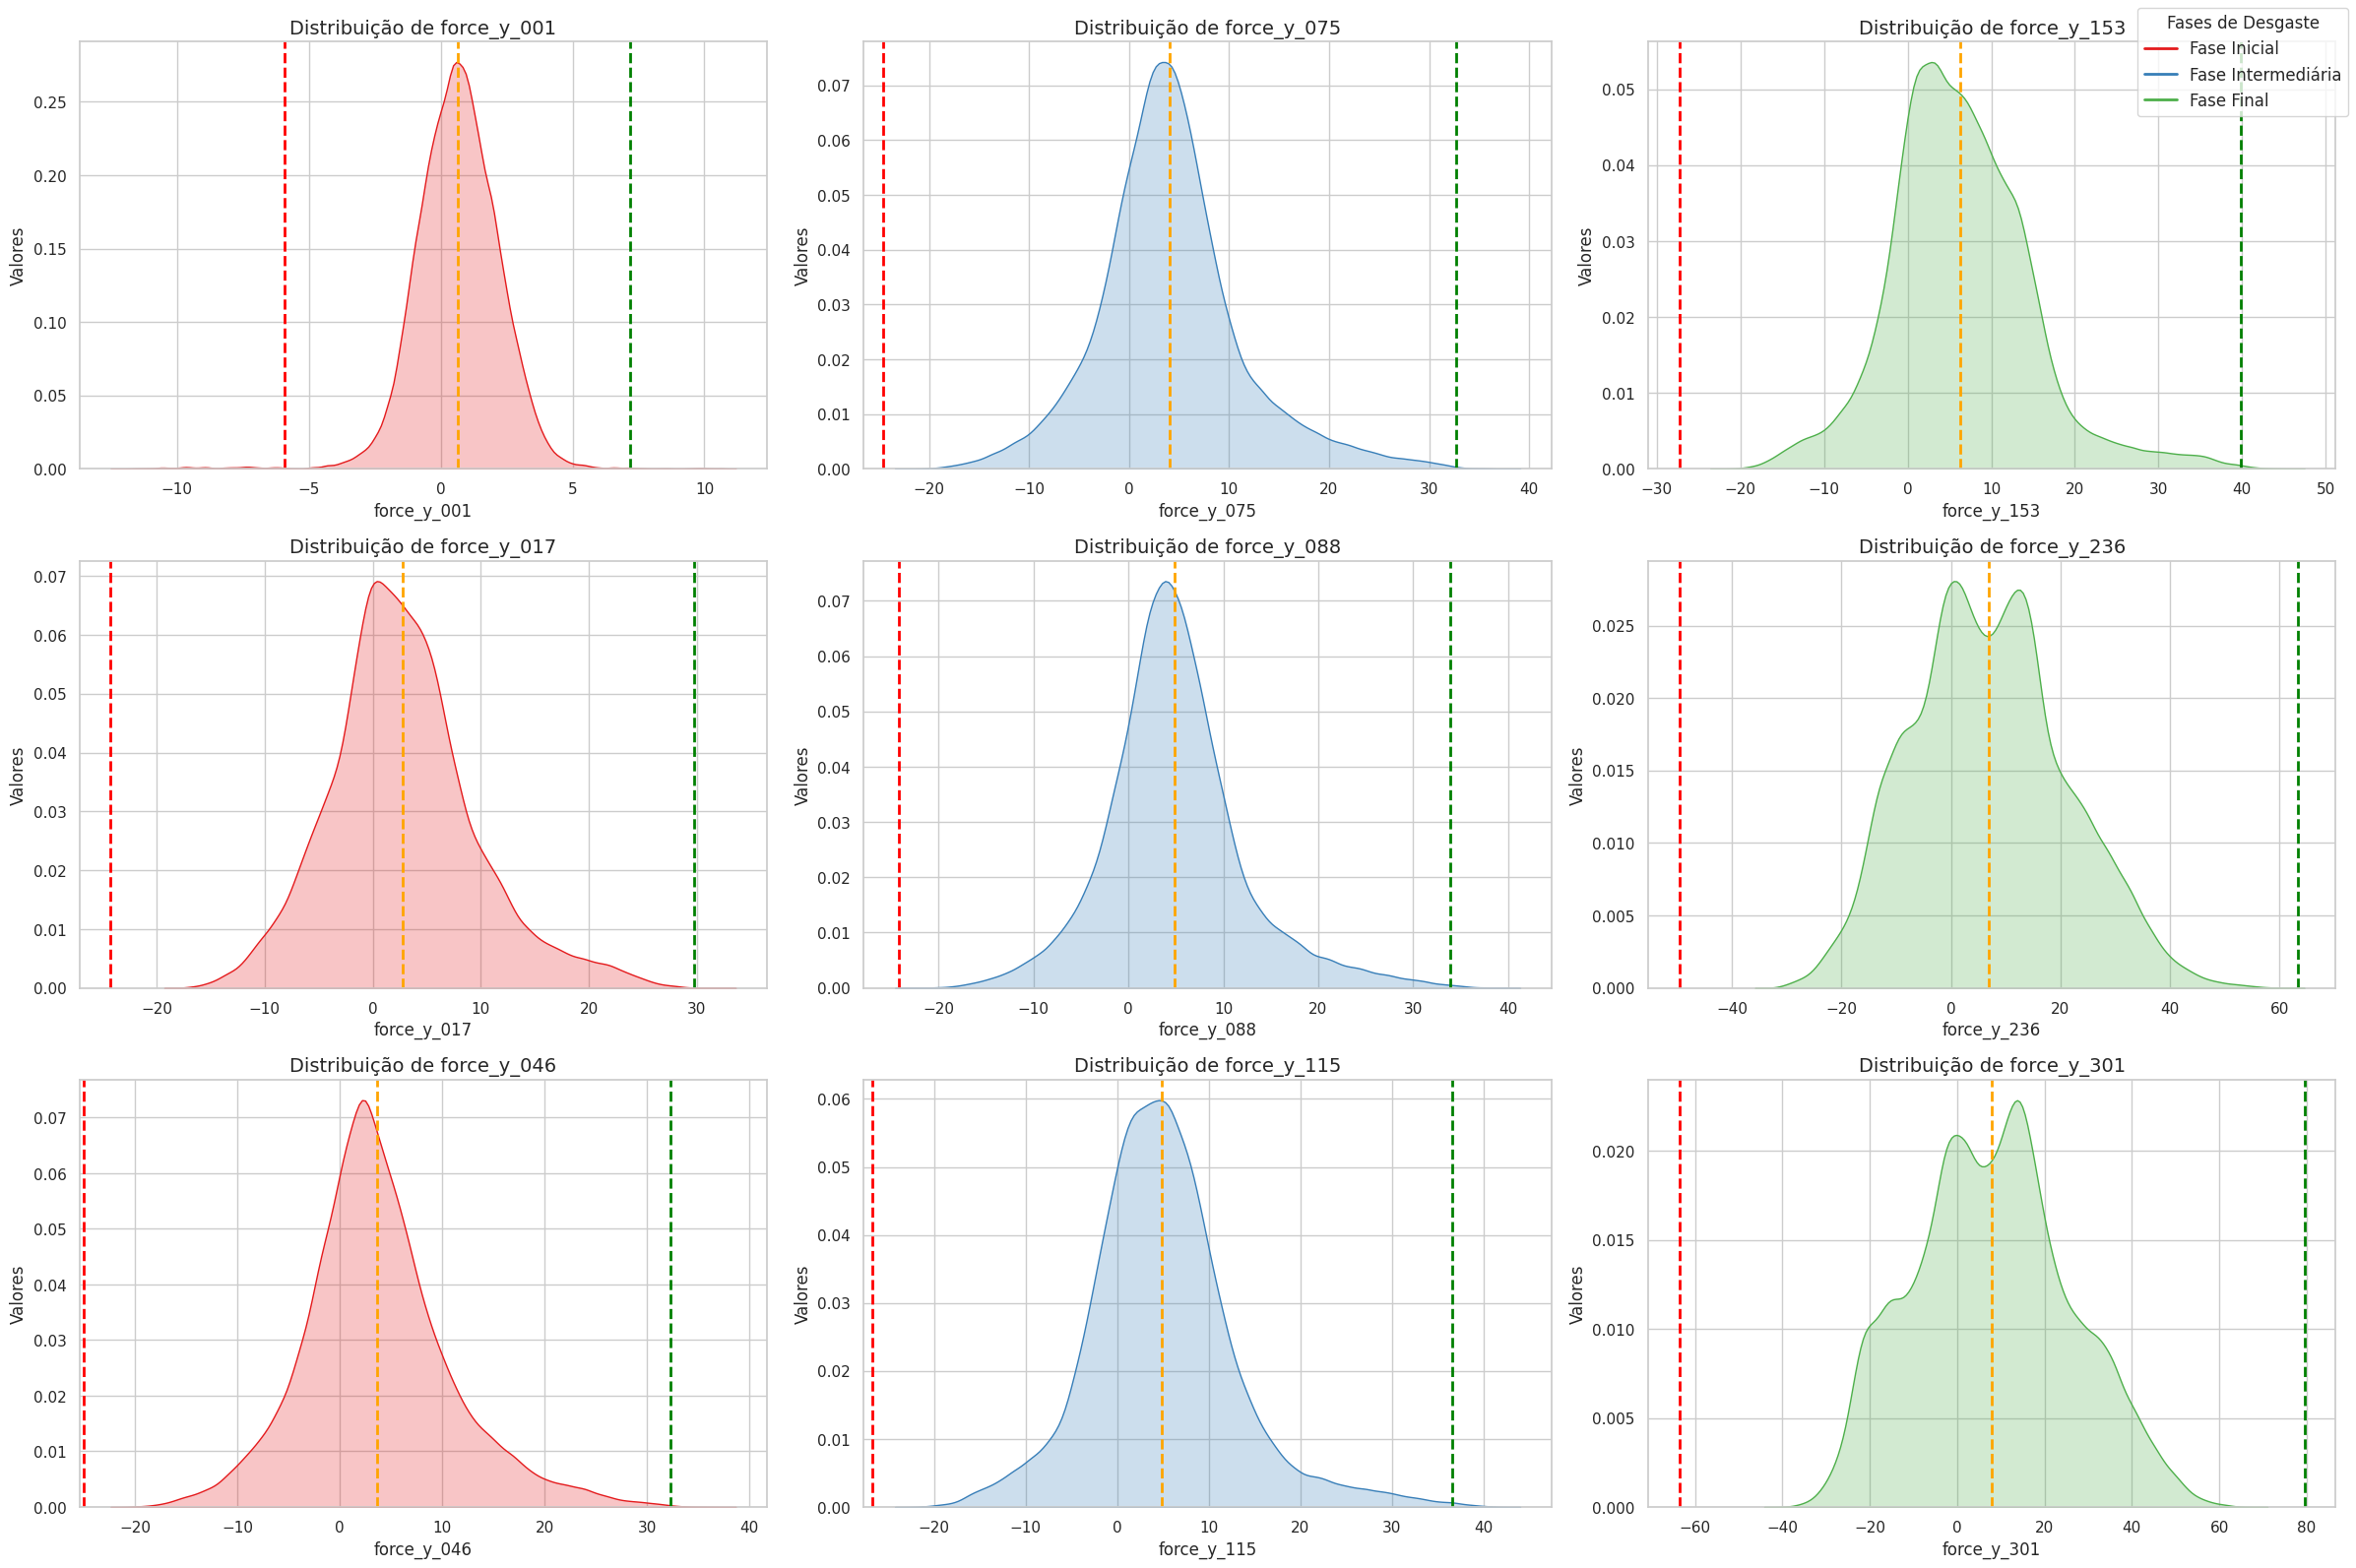

In [37]:
distribuicao_por_fase(idxs, 'force_y')

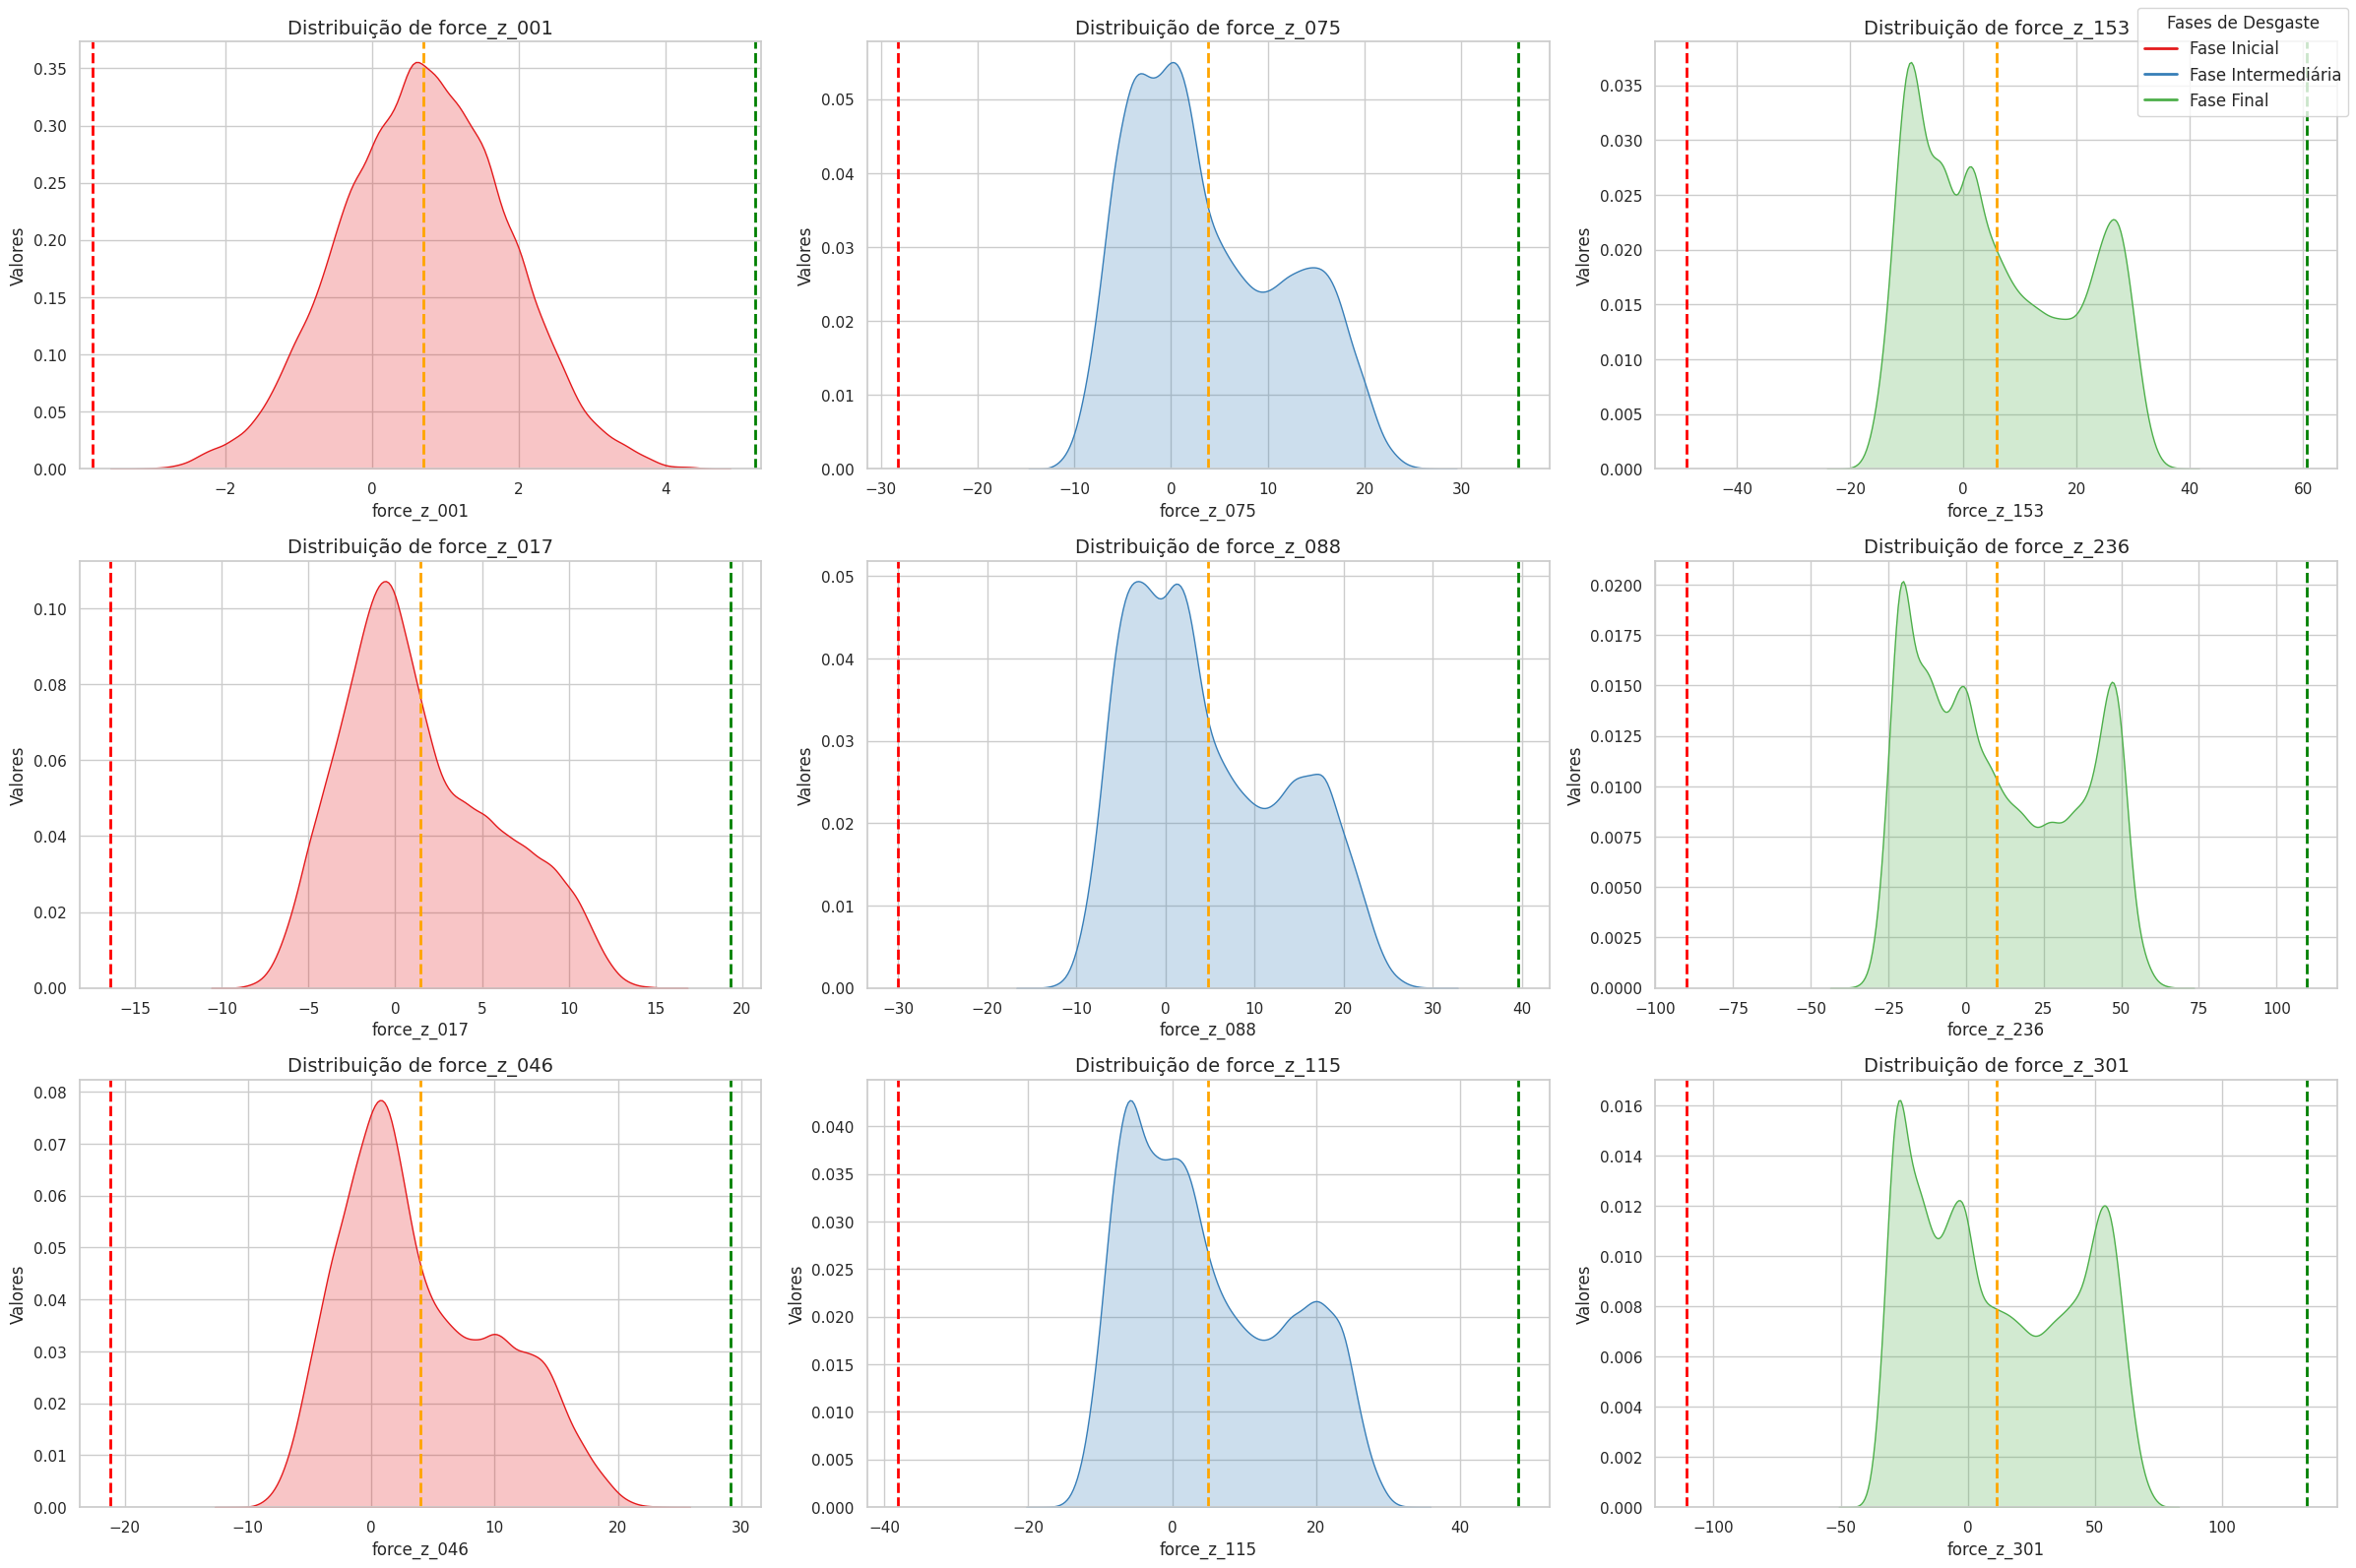

In [38]:
distribuicao_por_fase(idxs, 'force_z')

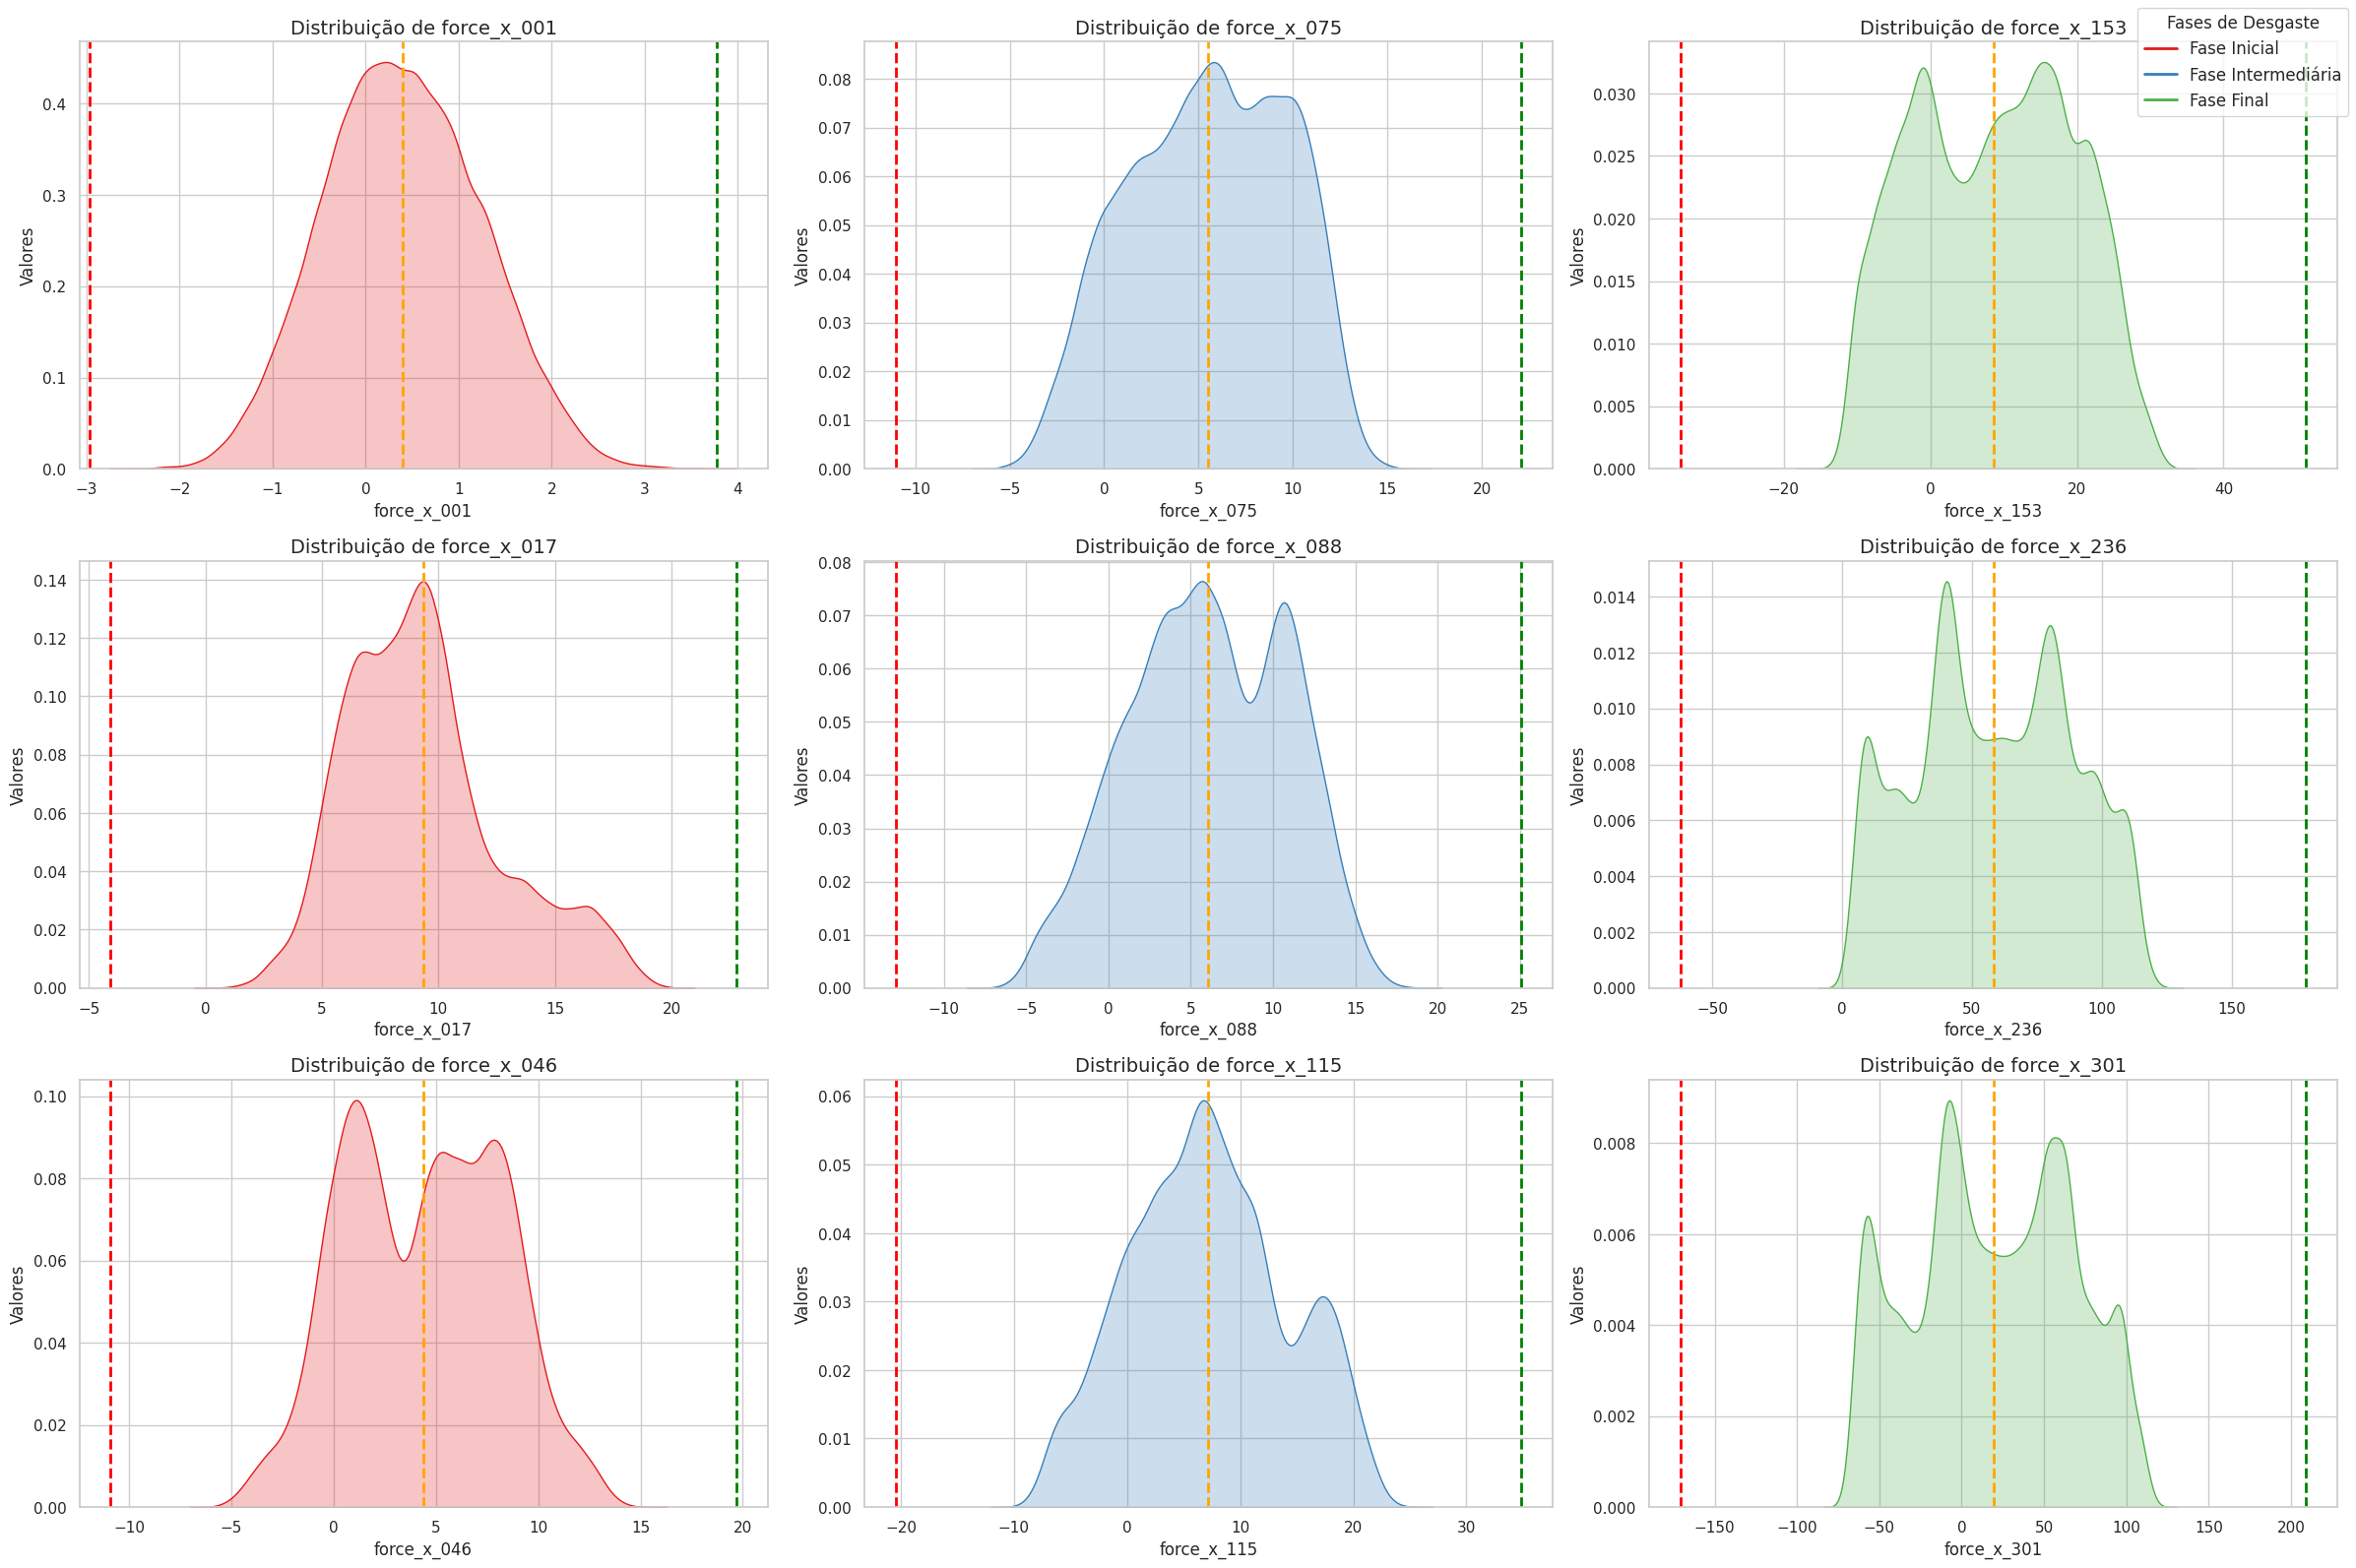

In [39]:
distribuicao_por_fase(idxs, 'force_x')

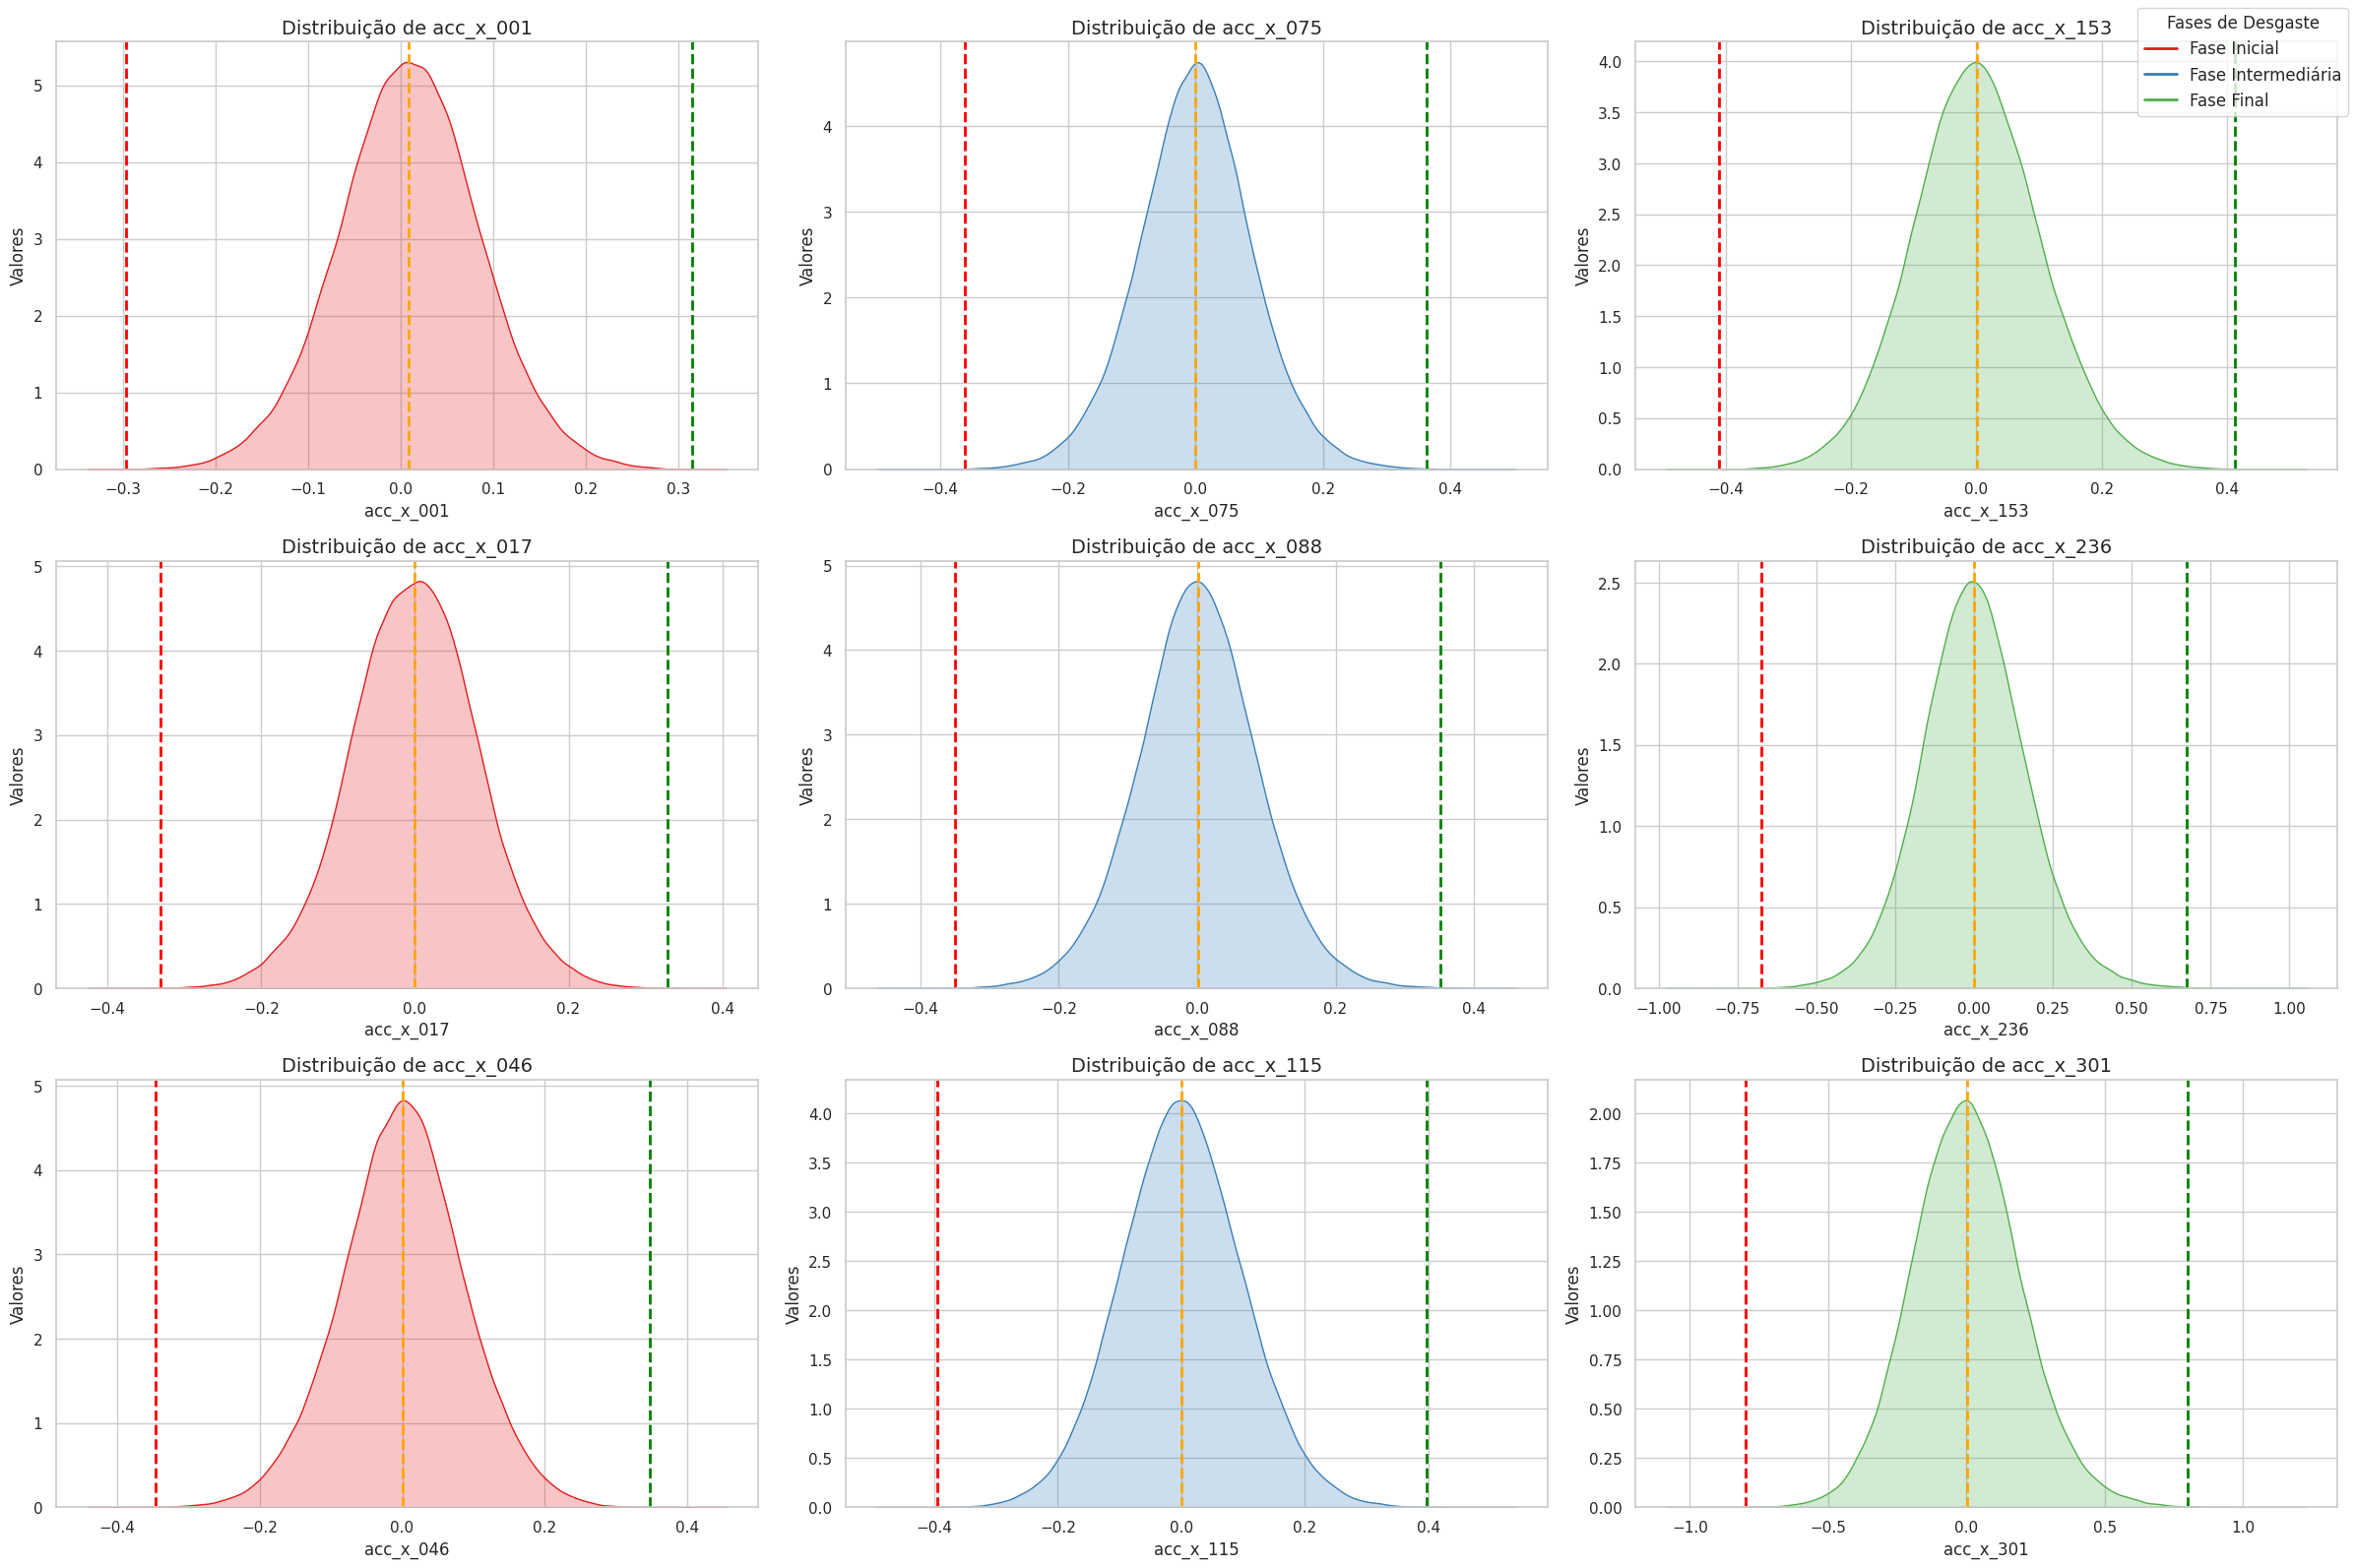

In [40]:
distribuicao_por_fase(idxs, 'acc_x')

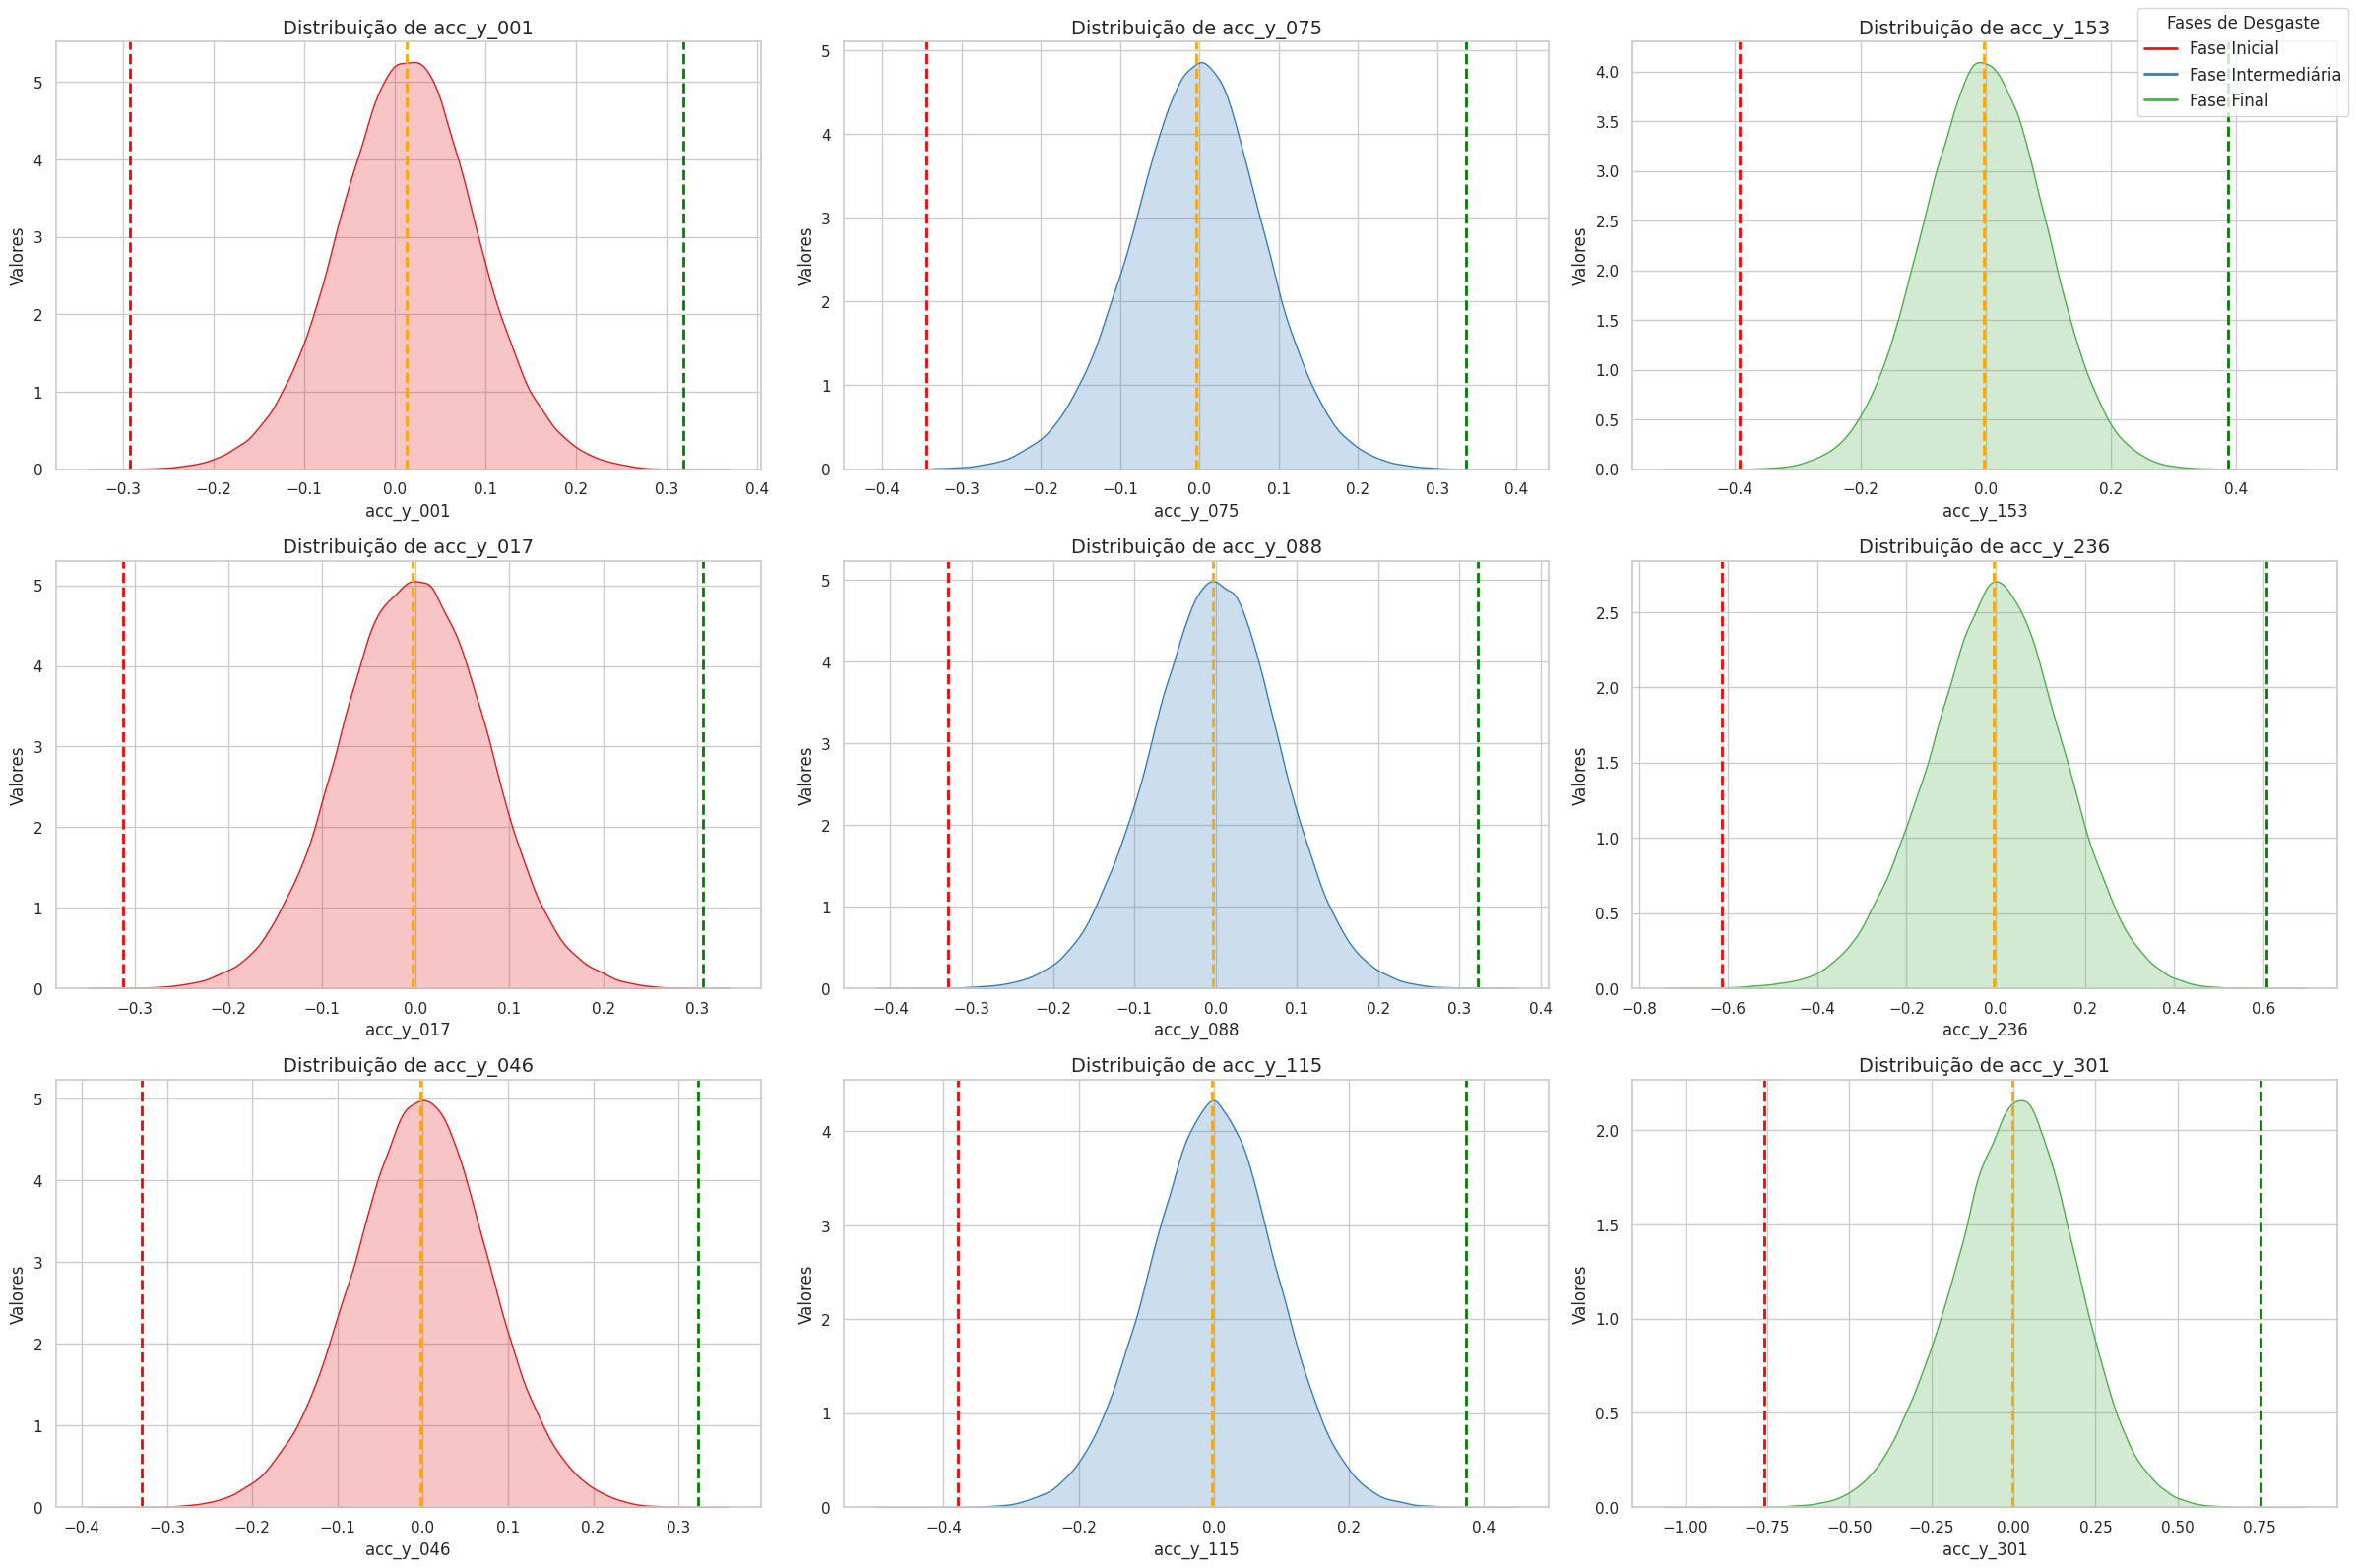

In [41]:
distribuicao_por_fase(idxs, 'acc_y')

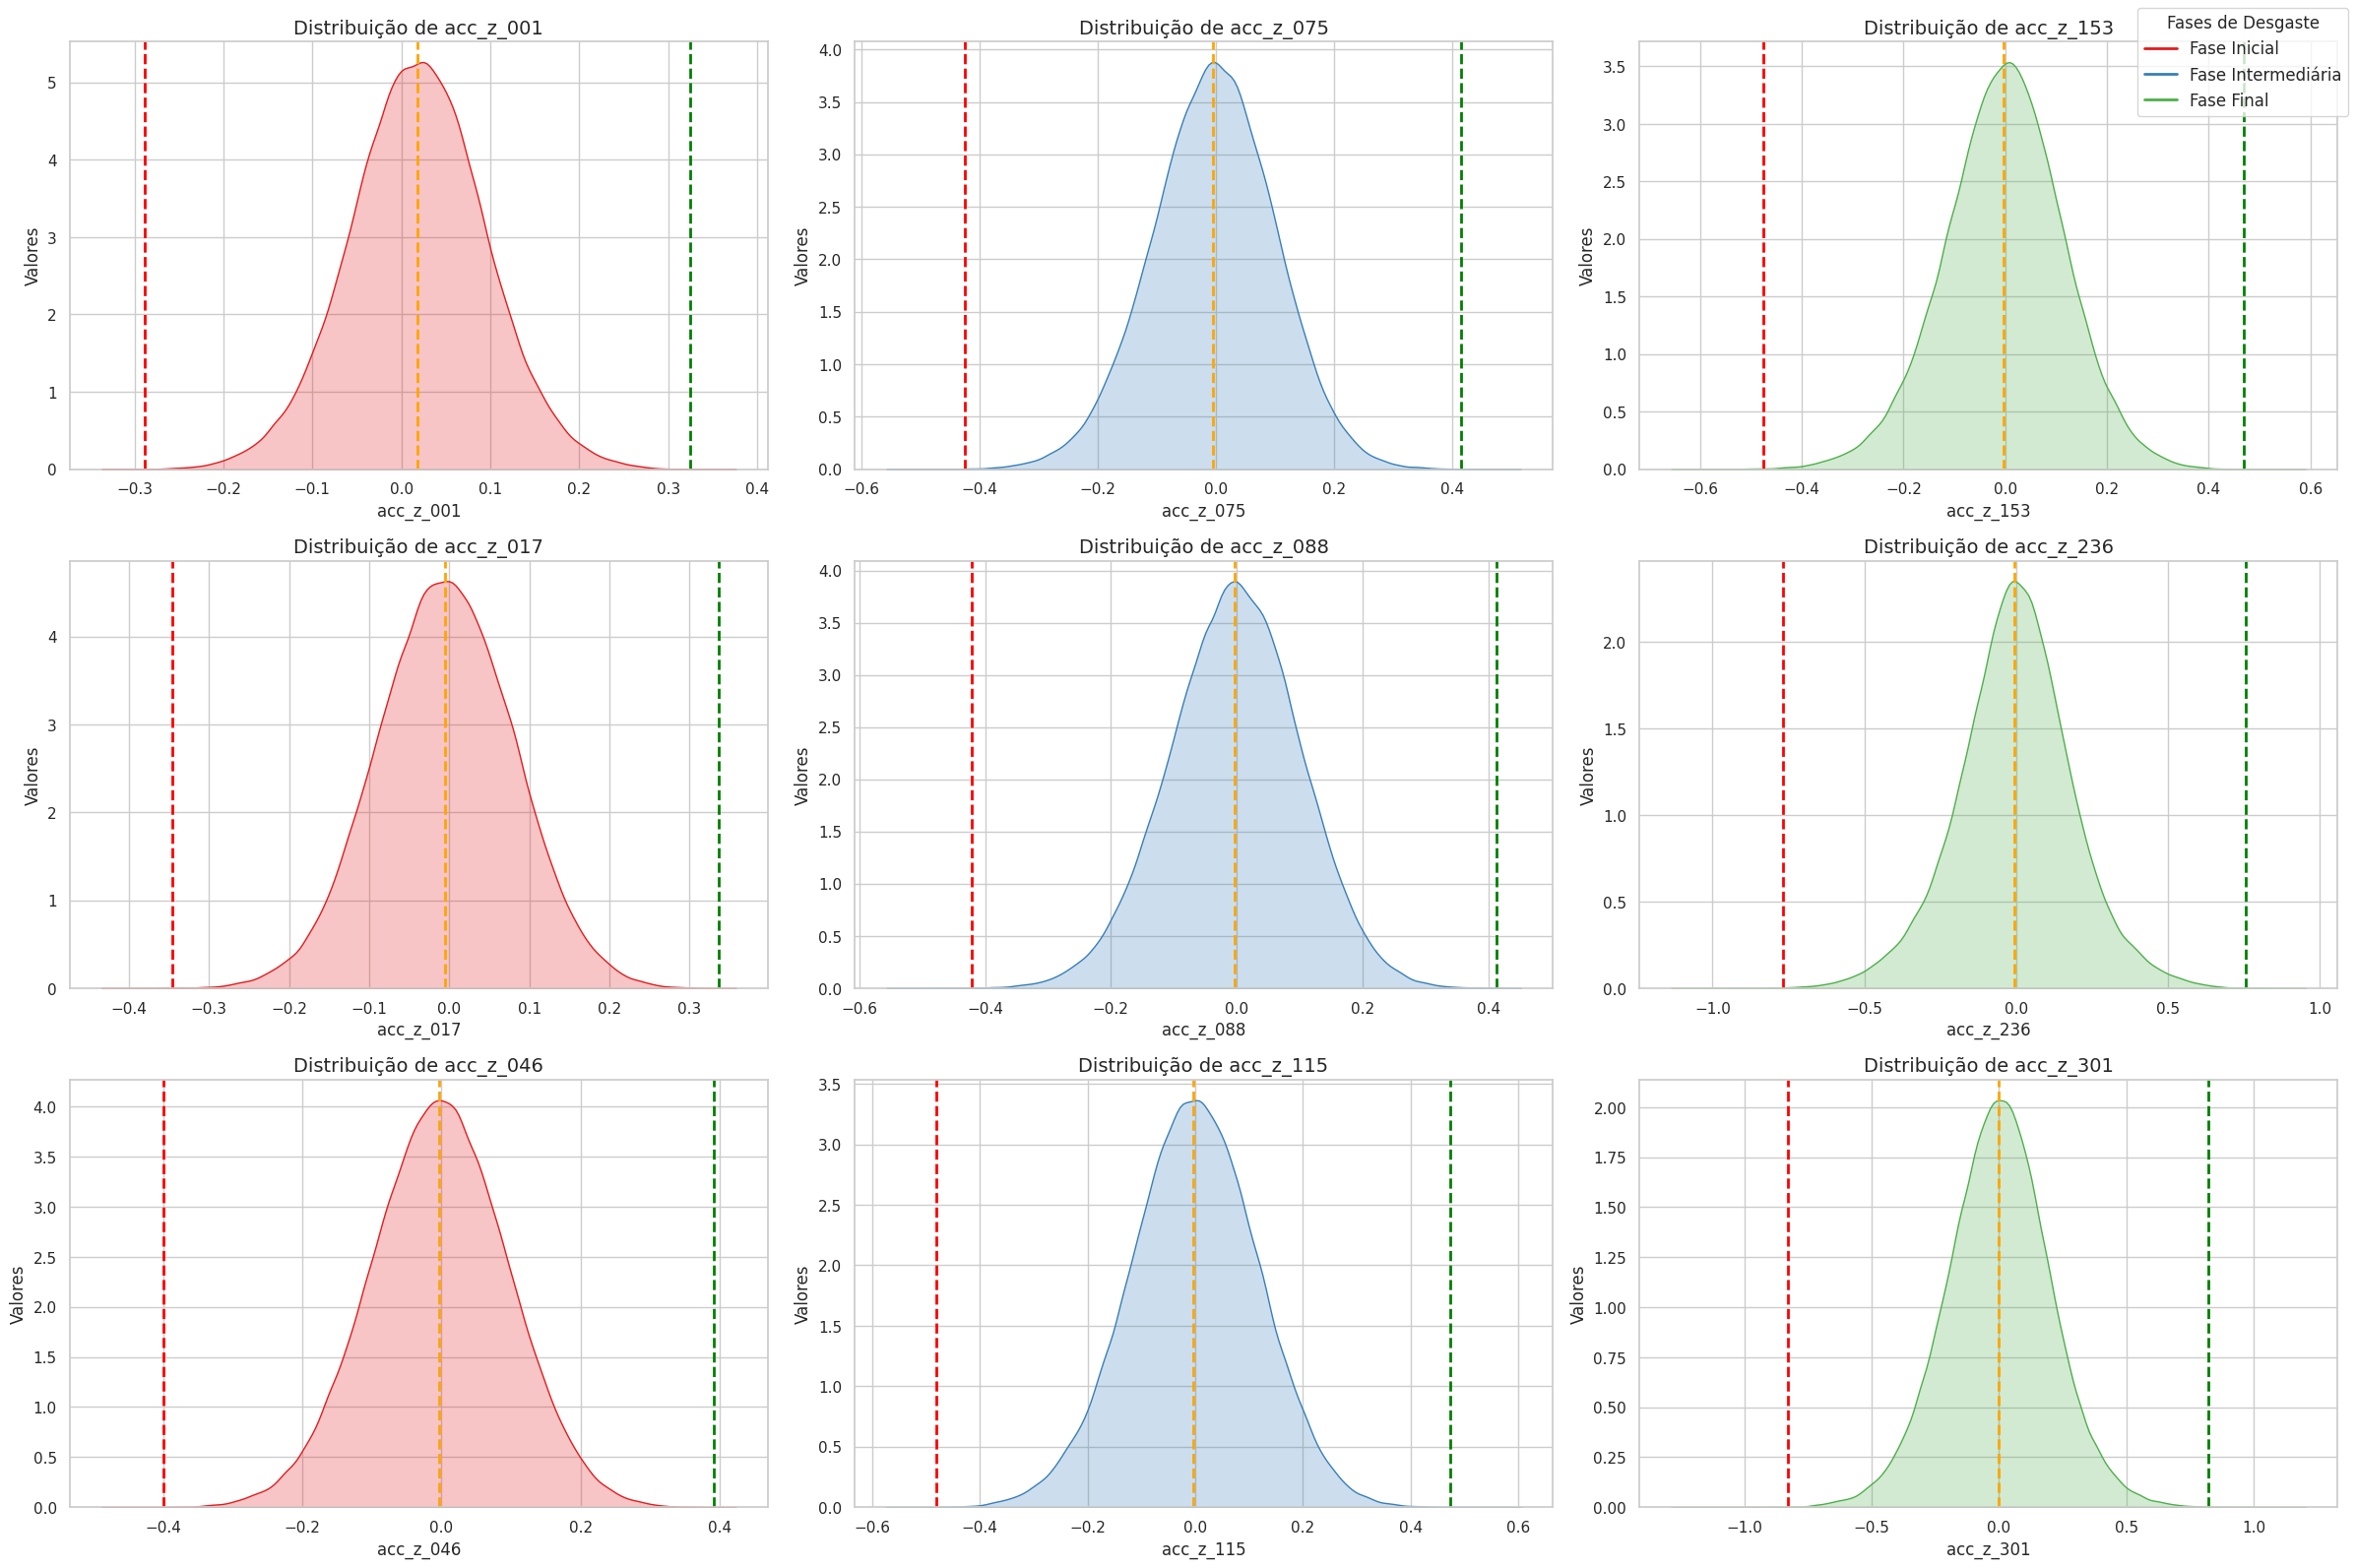

In [42]:
distribuicao_por_fase(idxs, 'acc_z')

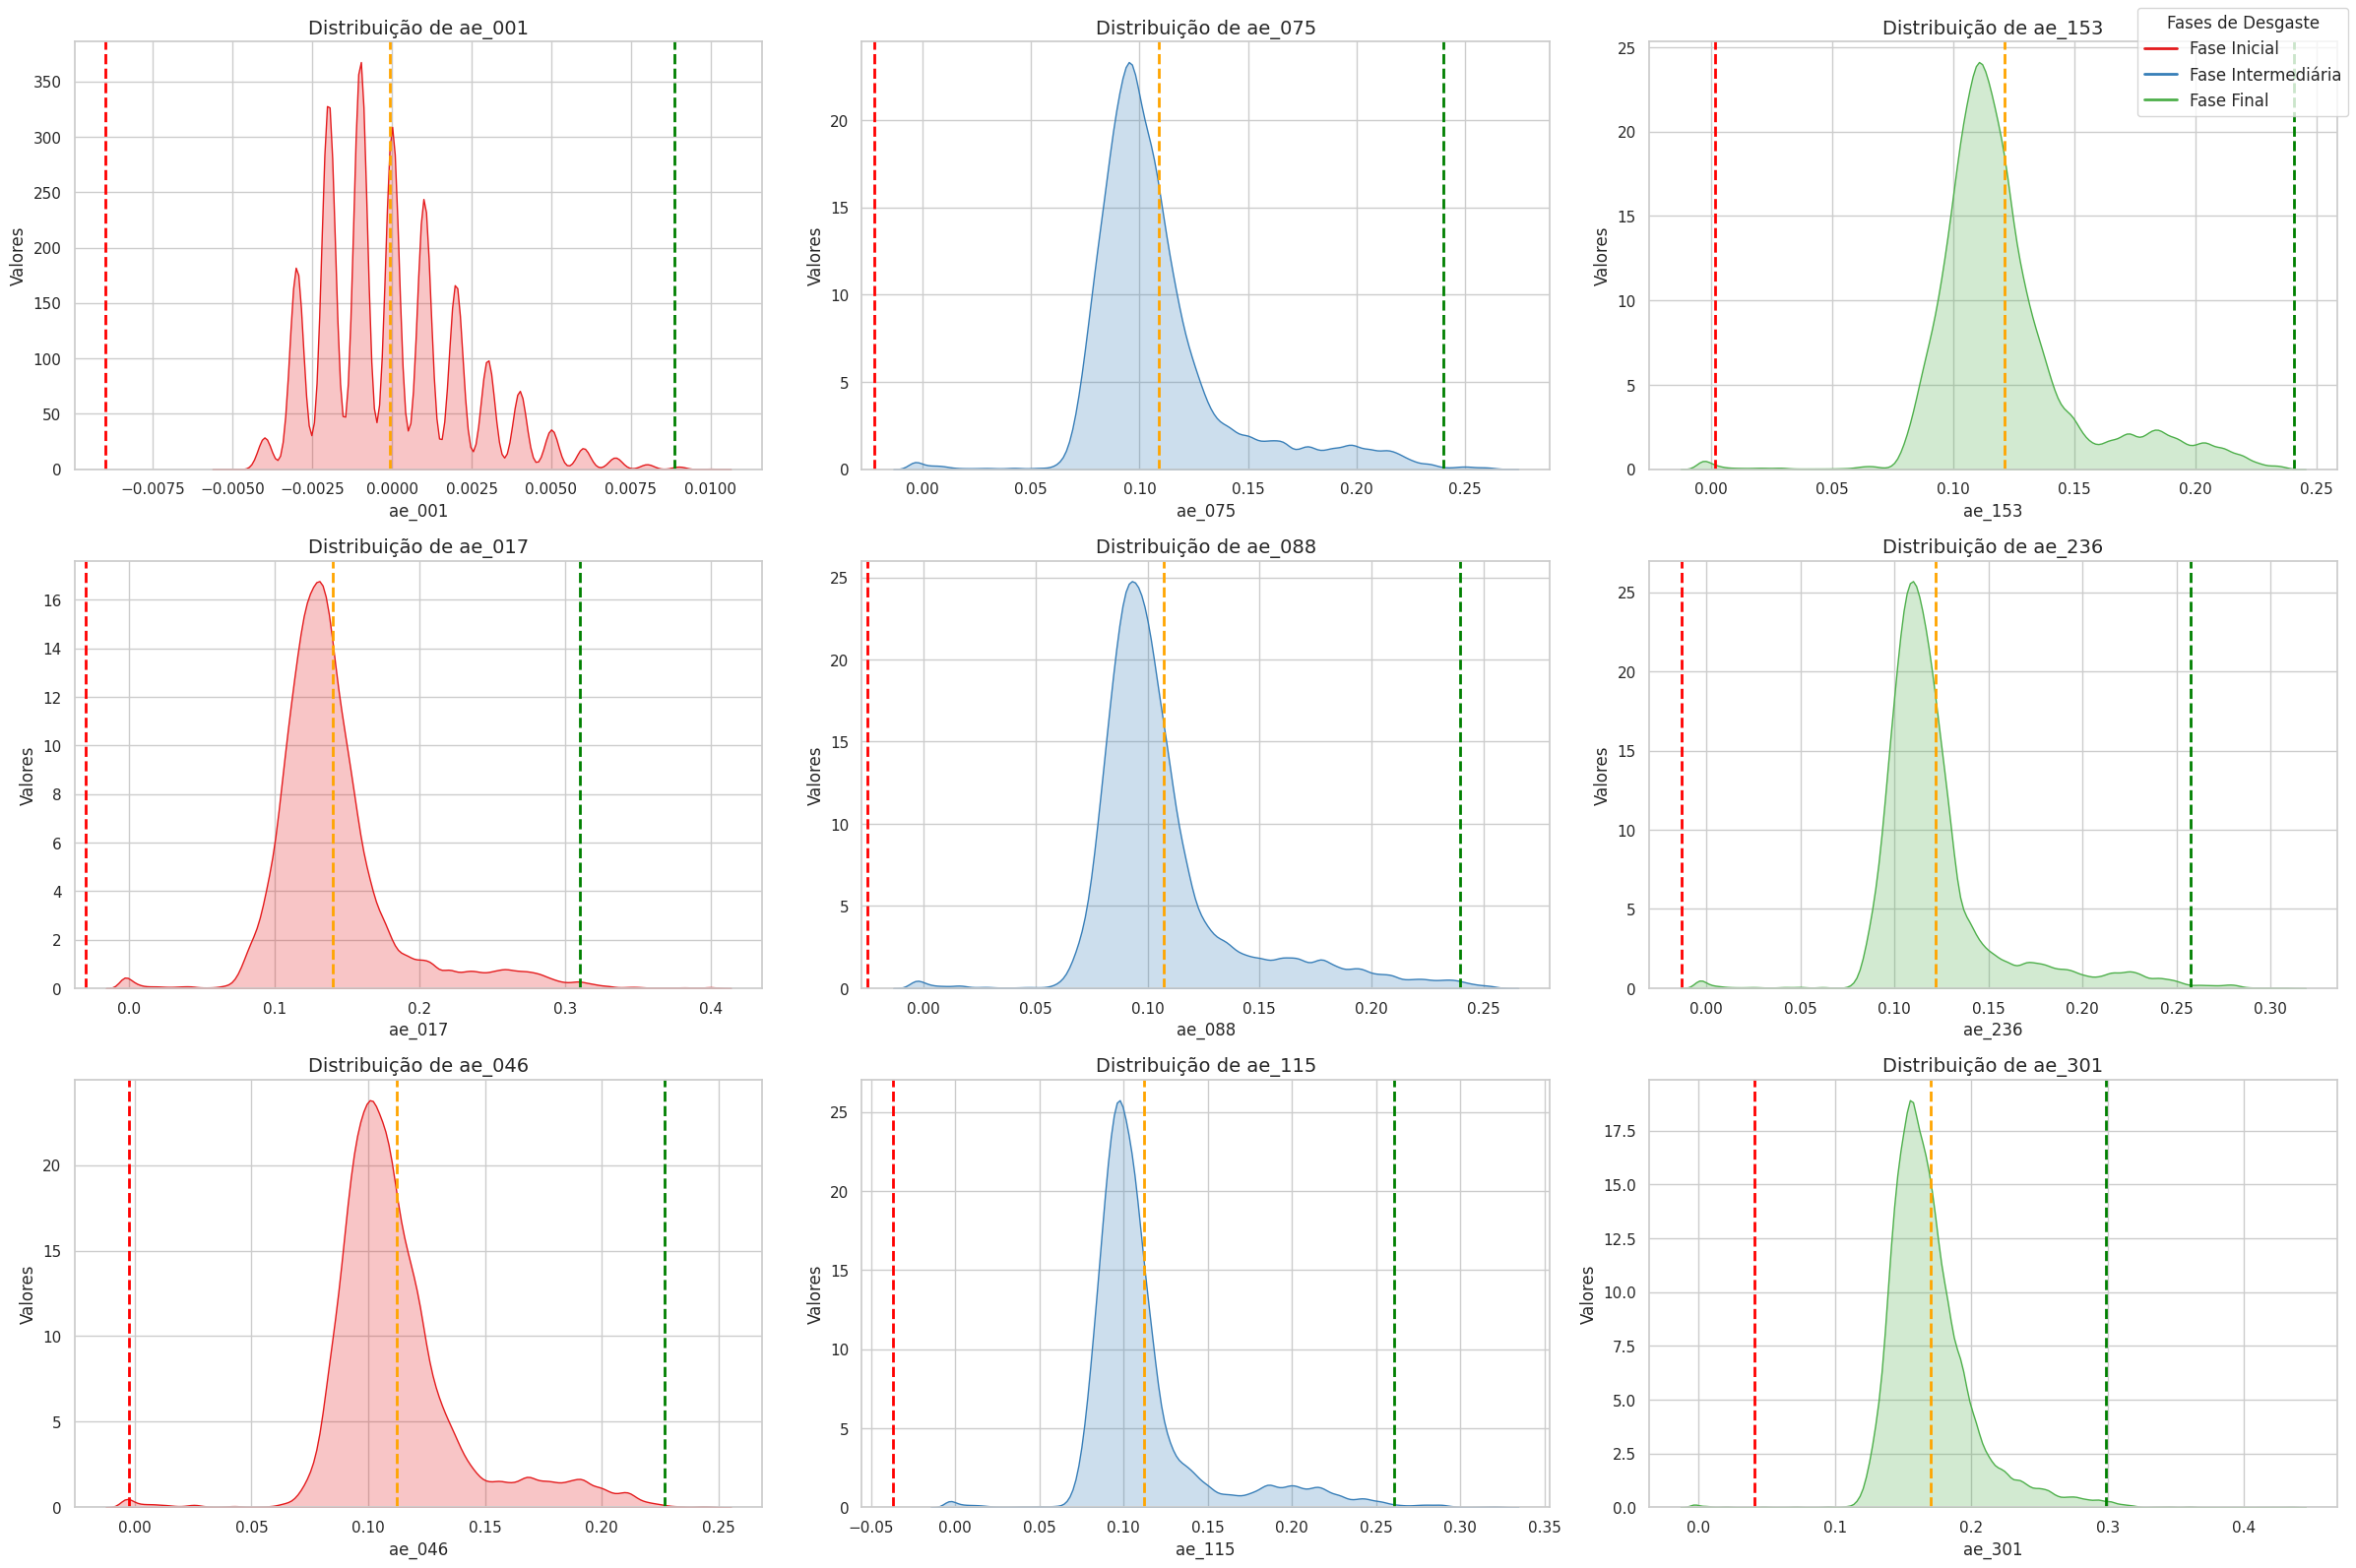

In [43]:
distribuicao_por_fase(idxs, 'ae')

# Rascunho



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Verificar os arquivos presentes
import os
os.listdir('/content/drive/My Drive/TCC - Desenvolvimento')

['c4_wear.csv', 'c1_wear.csv', 'c6_wear.csv', 'c1', 'c4', 'c6.zip', 'c6']

In [ ]:
# Carregar arquivo do corte 1 da ferramenta C1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/My Drive/TCC - Desenvolvimento/c1/c_1_001.csv'
cols = ['force_x', 'force_y', 'force_z', 'acc_x', 'acc_y', 'acc_z', 'ae']
df = pd.read_csv(file_path, header=None, names=cols)
df

force_x  force_y  force_z  acc_x  acc_y  acc_z     ae
0         0.704   -0.387   -1.084  0.018  0.031  0.027 -0.004
1         0.772   -0.573   -1.153 -0.056 -0.057 -0.058 -0.004
2         0.828   -0.673   -1.242  0.037  0.019  0.031 -0.004
3         0.866   -0.601   -1.311 -0.028 -0.027 -0.022 -0.004
4         0.910   -0.377   -1.341 -0.050 -0.049 -0.058 -0.004
...         ...      ...      ...    ...    ...    ...    ...
127394    0.248    0.692    0.531 -0.085 -0.082 -0.071 -0.004
127395    0.245    0.689    0.483  0.184  0.186  0.194 -0.004
127396    0.220    0.630    0.415  0.067  0.066  0.073 -0.004
127397    0.218    0.537    0.346 -0.099 -0.098 -0.087 -0.004
127398    0.207    0.483    0.292  0.111  0.114  0.125 -0.004

[127399 rows x 7 columns]

In [ ]:
# Verificar dados globais
a = df.force_x.describe()

In [ ]:
b = df.force_y.describe()

In [ ]:
base = pd.DataFrame()
pd.concat([base, pd.DataFrame(a)])

force_x
count  127399.000000
mean        0.400857
std         0.842471
min        -2.501000
25%        -0.198000
50%         0.377000
75%         0.984000
max         3.744000

In [ ]:
pd.DataFrame(a)

force_x
count  127399.000000
mean        0.400857
std         0.842471
min        -2.501000
25%        -0.198000
50%         0.377000
75%         0.984000
max         3.744000

In [ ]:
pd.concat([a,b], axis=1)

force_x        force_y
count  127399.000000  127399.000000
mean        0.400857       0.629463
std         0.842471       1.635964
min        -2.501000     -12.051000
25%        -0.198000      -0.342000
50%         0.377000       0.641000
75%         0.984000       1.635000
max         3.744000      10.724000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127399 entries, 0 to 127398
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   force_x  127399 non-null  float64
 1   force_y  127399 non-null  float64
 2   force_z  127399 non-null  float64
 3   acc_x    127399 non-null  float64
 4   acc_y    127399 non-null  float64
 5   acc_z    127399 non-null  float64
 6   ae       127399 non-null  float64
dtypes: float64(7)
memory usage: 6.8 MB


<Axes: >

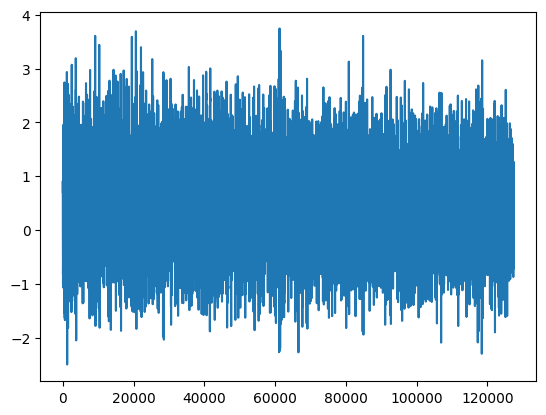

In [ ]:
df.force_x.plot()

<Axes: >

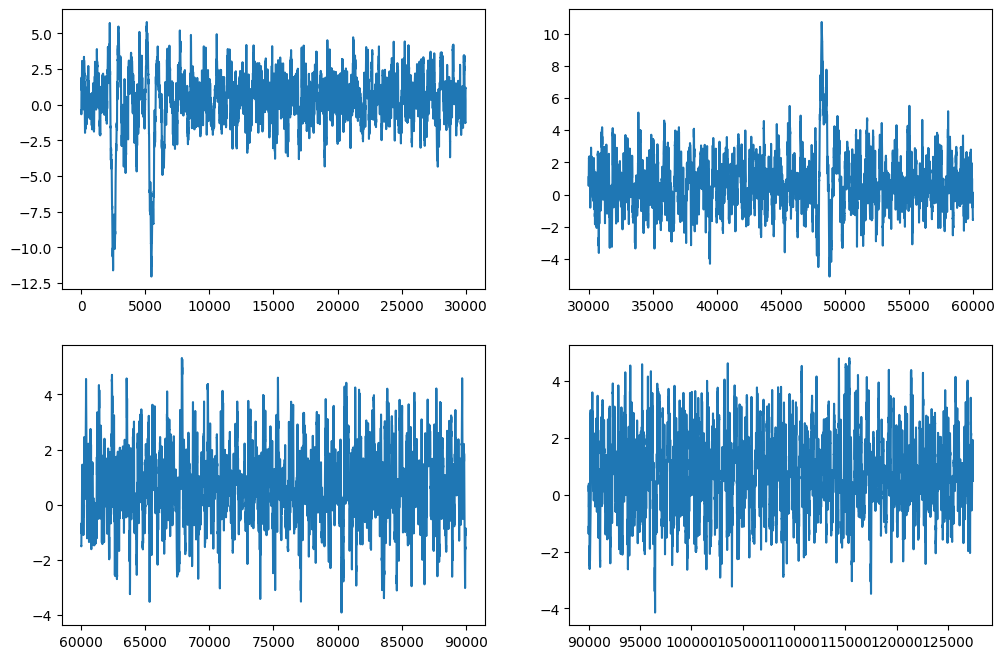

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
df.force_y.iloc[:30000].plot(ax=axs[0,0])
df.force_y.iloc[30000:60000].plot(ax=axs[0,1])
df.force_y.iloc[60000:90000].plot(ax=axs[1,0])
df.force_y.iloc[90000:len(df)].plot(ax=axs[1,1])

<ipython-input-63-3219a3f9fbd1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['force_y'], shade=True)


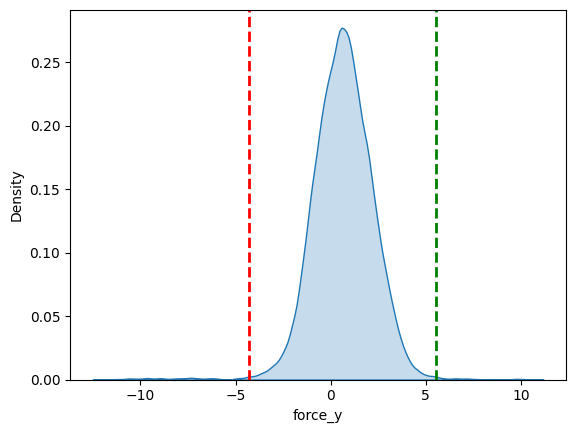

In [ ]:
sns.kdeplot(df['force_y'], shade=True)
plt.axvline(limite_min, color='red', linestyle='dashed', linewidth=2)
plt.axvline(limite_max, color='green', linestyle='dashed', linewidth=2)
plt.show()

<Axes: >

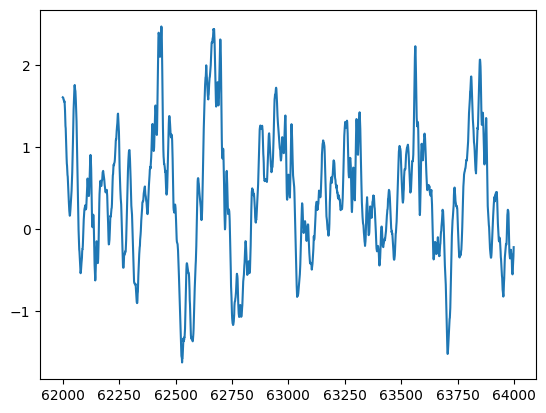

In [ ]:
# Verificar os outliers
df.force_x.iloc[62000:64000].plot()

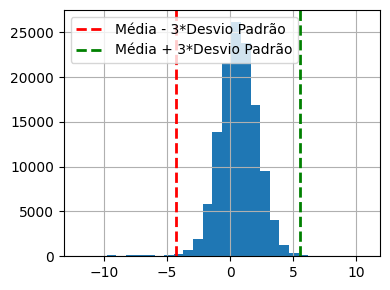

In [ ]:
# Calcular a média e o desvio padrão
media = df['force_y'].mean()
desvio_padrao = df['force_y'].std()

# Definir os limites
limite_min = media - 3 * desvio_padrao
limite_max = media + 3 * desvio_padrao

# Plotar o histograma
df['force_y'].hist(bins=30, figsize=(4, 3))

# Adicionar as linhas verticais
plt.axvline(limite_min, color='red', linestyle='dashed', linewidth=2, label='Média - 3*Desvio Padrão')
plt.axvline(limite_max, color='green', linestyle='dashed', linewidth=2, label='Média + 3*Desvio Padrão')

# Ajustar o layout e exibir a legenda
plt.tight_layout()
plt.legend()
plt.show()

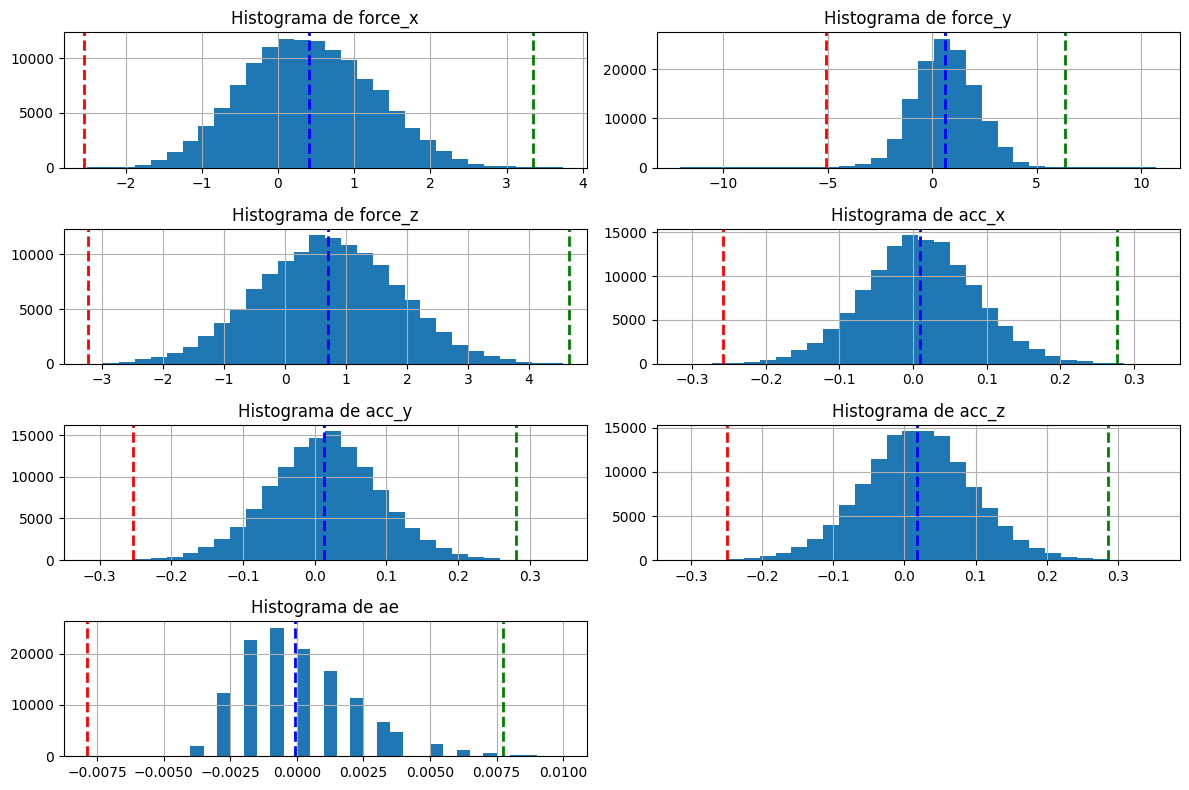

In [ ]:
import matplotlib.pyplot as plt

# Lista de variáveis a serem analisadas
variaveis = ['force_x', 'force_y', 'force_z', 'acc_x', 'acc_y', 'acc_z', 'ae']

# Função para gerar o histograma e as linhas verticais para cada variável
def plot_histograma_com_limites(df, variavel):
    media = df[variavel].mean()
    desvio_padrao = df[variavel].std()

    # Definir os limites
    limite_min = media - 3.5 * desvio_padrao
    limite_max = media + 3.5 * desvio_padrao

    # Plotar o histograma
    df[variavel].hist(bins=30, figsize=(12, 8))

    # Adicionar as linhas verticais
    plt.axvline(limite_min, color='red', linestyle='dashed', linewidth=2, label='Média - 3*Desvio Padrão')
    plt.axvline(limite_max, color='green', linestyle='dashed', linewidth=2, label='Média + 3*Desvio Padrão')
    plt.axvline(media, color='blue', linestyle='dashed', linewidth=2, label='Média')

    # Adicionar título e legenda
    plt.title(f'Histograma de {variavel}')
    #plt.legend()

# Criar múltiplos gráficos
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(40, 30))  # Ajuste nrows e ncols conforme necessário
axs = axs.ravel()  # Para iterar facilmente sobre os eixos

for i, variavel in enumerate(variaveis):
    plt.sca(axs[i])  # Definir o eixo atual para o gráfico
    plot_histograma_com_limites(df, variavel)

# Remover eixo extra se necessário (caso nrows * ncols seja maior que o número de variáveis)
for j in range(len(variaveis), len(axs)):
    fig.delaxes(axs[j])

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

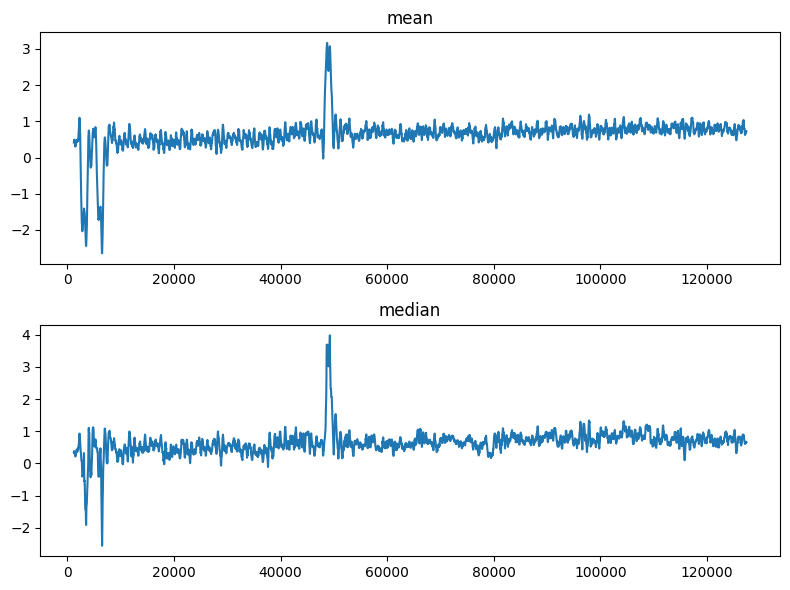

In [ ]:
# Identificação desses outliers
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
df.force_y.rolling(1200).mean().plot(ax=ax[0], title='mean')
df.force_y.rolling(1200).median().plot(ax=ax[1], title='median')
plt.tight_layout()
plt.show()

<Axes: >

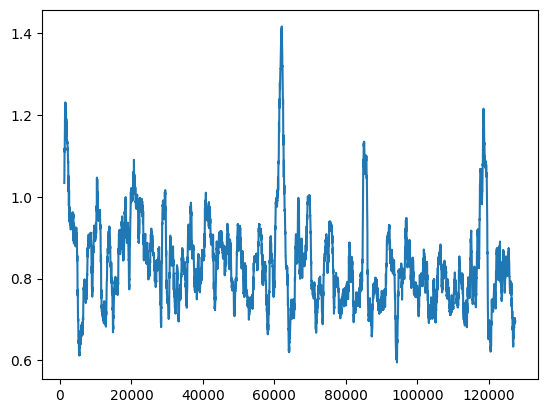

In [ ]:
df.force_x.rolling(1200).std().plot()

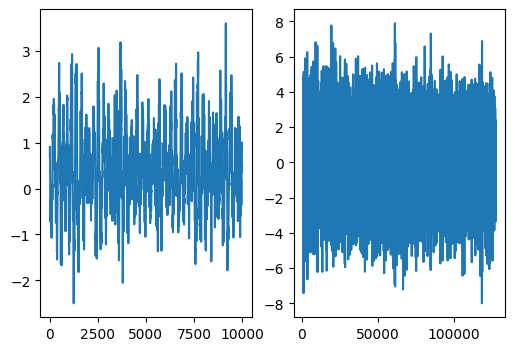

In [ ]:
# detecção de outliers
import numpy as np

def percent_change(values):
  """Calculates the % change between the last value and the mean of previous values"""
  # Separate the last value and all previous values into variables
  previous_values = values.iloc[:-1]
  last_value = values.iloc[-1]

  # Calculate the % difference between the last value and the mean of earlier values
  percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
  return percent_change

# Plot the raw data
fig, axs = plt.subplots(1, 2, figsize=(6, 4))
ax = df.force_x.iloc[:10000].plot(ax=axs[0])

# Calculate % change and plot
ax = df.force_x.rolling(window=1200).aggregate(percent_change).plot(ax=axs[1])

## Avaliação da curva de desgaste

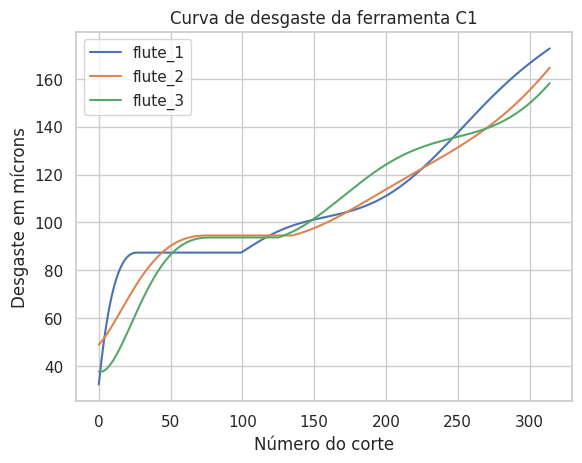

In [21]:
# Importar os dados

os.listdir('/content/drive/My Drive/TCC - Desenvolvimento')
file_path = '/content/drive/My Drive/TCC - Desenvolvimento/c1_wear.csv'
#cols = ['force_x', 'force_y', 'force_z', 'acc_x', 'acc_y', 'acc_z', 'ae']
wear_curve = pd.read_csv(file_path)#, header=True, names=cols)
wear_curve.iloc[:, 1:].plot()
plt.title('Curva de desgaste da ferramenta C1')
plt.xlabel('Número do corte')
plt.ylabel('Desgaste em mícrons')
plt.legend()
plt.show()

<Axes: >

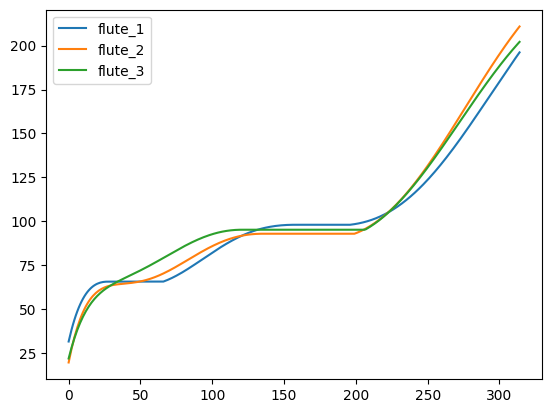

In [ ]:
os.listdir('/content/drive/My Drive/TCC - Desenvolvimento')
file_path = '/content/drive/My Drive/TCC - Desenvolvimento/c4_wear.csv'
#cols = ['force_x', 'force_y', 'force_z', 'acc_x', 'acc_y', 'acc_z', 'ae']
wear_curve = pd.read_csv(file_path)#, header=True, names=cols)
wear_curve.iloc[:, 1:].plot()